In [42]:
# Automatically reload modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
import seaborn as sns
#Setting theme
sns.set_theme(style="whitegrid")

In [44]:
# Imports
from hmpinn.utils.yaml_utils import load_model
from hmpinn.plotting import plot_errors_from_path, plot_errors_from_data
from hmpinn.plotting.plotting_harmonic_maps import plot_boundary_comparison, plot_grid_comparison

In [45]:
grid_sizes = [2, 15, 30, 50]

# Polynomial boundaries

The harmonic map problem that we need to solve is

$$ A(D u):H(u_i)= 0 \quad \text{ for } \quad i \in \{1,2\}$$

with
$$ A(D u) = \begin{pmatrix} (\partial_{x_2} u) \cdot (\partial_{x_2} u) & - (\partial_{x_1} u) \cdot (\partial_{x_2} u) \\ - (\partial_{x_1} u) \cdot (\partial_{x_2} u) & (\partial_{x_1} u) \cdot (\partial_{x_1} u) \end{pmatrix} $$
with the boundary condition of 
$$
g(x_1, x_2) = \begin{pmatrix} g_1(x_1, x_2) \\
 g_2(x_1, x_2) \end{pmatrix} \quad (x_1, x_2) \in \partial([0,1]^2)
$$


where
$$g_1(x_1, x_2) = \begin{cases}
x_1 + a_{\text{left}} \cdot p_{\text{left}}(x_2) & \text{if } x_1 = 0 \text{ (left boundary)} \\
x_1 - a_{\text{right}} \cdot p_{\text{right}}(x_2) & \text{if } x_1 = 1 \text{ (right boundary)}
\end{cases}$$
$$g_2(x_1, x_2) = \begin{cases}
x_2 + b_{\text{bottom}} \cdot p_{\text{bottom}}(x_1) & \text{if } x_2 = 0 \text{ (bottom boundary)} \\
x_2 - b_{\text{top}} \cdot p_{\text{top}}(x_1) & \text{if } x_2 = 1 \text{ (top boundary)} 
\end{cases}$$

with $p_{\text{left}}, p_{\text{right}}, p_{\text{bottom}}, p_{\text{top}}$ are some arbitrary polynomials of degree 3 or 4 and $a_{\text{left}}, a_{\text{right}}, b_{\text{bottom}}, b_{\text{top}}$ and $degree$ are parameters that can be varied.

## The boundary condition

In [46]:
from hmpinn.PDEs.harmonic_maps.poly_boundaries import polynomial_boundaries_BC
from functools import partial

In [47]:
a_left= -0.475
a_right= 2.75
b_bottom= 2.75
b_top= -3.52
degree= 4
partial_poly_boundaries = partial(polynomial_boundaries_BC, a_left=a_left, a_right=a_right, b_bottom=b_bottom, b_top=b_top, degree=degree)

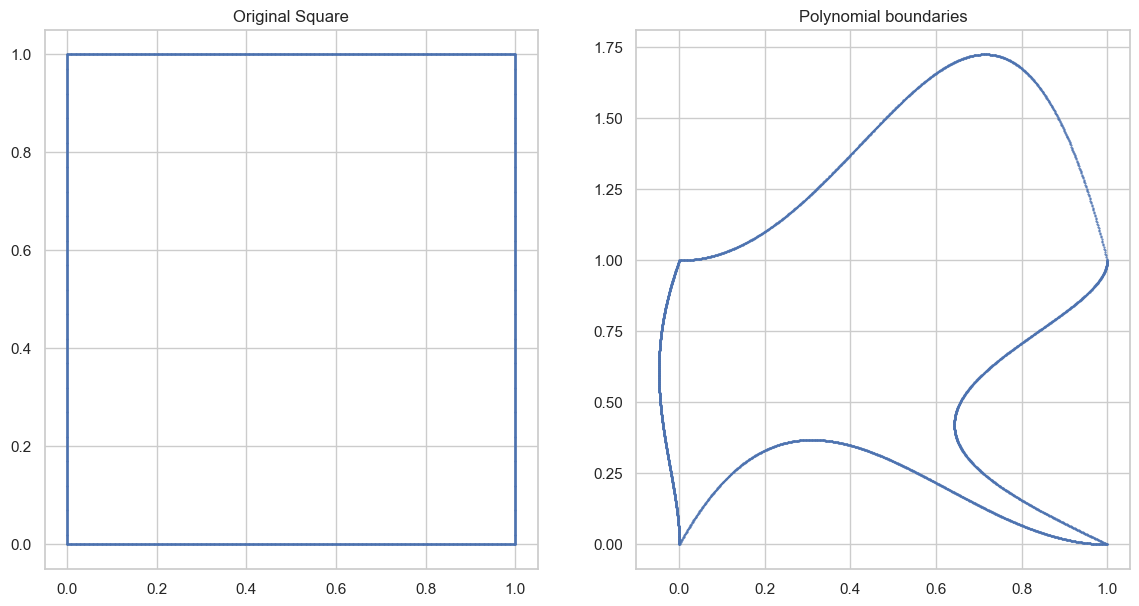

In [48]:
plot_boundary_comparison(partial_poly_boundaries, title="Polynomial boundaries")

## Losses

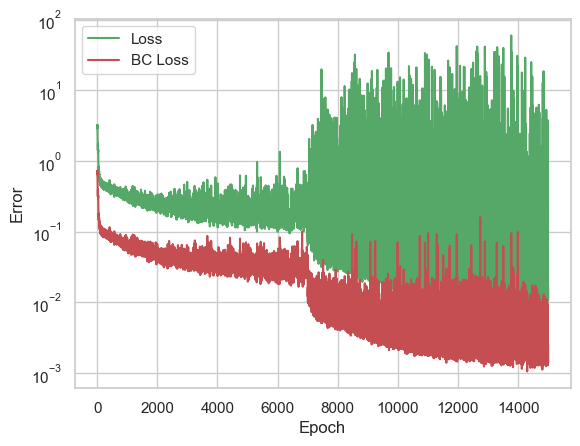

In [49]:
path = "../simulation_studies/harmonic_maps/outputs/poly_boundaries_hm_a_left_-0.475_a_right_2.75_b_bottom_2.75_b_top_-3.52_degree_4"
plot_errors_from_path(path)

In [50]:
hm, _, _, _, _ = load_model(path)
hm.eval()

print(hm)

ModelV2(
  (network): Sequential(
    (layer_0): Linear(in_features=2, out_features=64, bias=True)
    (gelu_0): GELU(approximate='none')
    (layer_1): Linear(in_features=64, out_features=64, bias=True)
    (gelu_1): GELU(approximate='none')
    (layer_2): Linear(in_features=64, out_features=64, bias=True)
    (gelu_2): GELU(approximate='none')
    (layer_3): Linear(in_features=64, out_features=64, bias=True)
    (gelu_3): GELU(approximate='none')
    (layer_4): Linear(in_features=64, out_features=64, bias=True)
    (gelu_4): GELU(approximate='none')
    (layer_5): Linear(in_features=64, out_features=64, bias=True)
    (gelu_5): GELU(approximate='none')
    (layer_6): Linear(in_features=64, out_features=2, bias=True)
  )
)


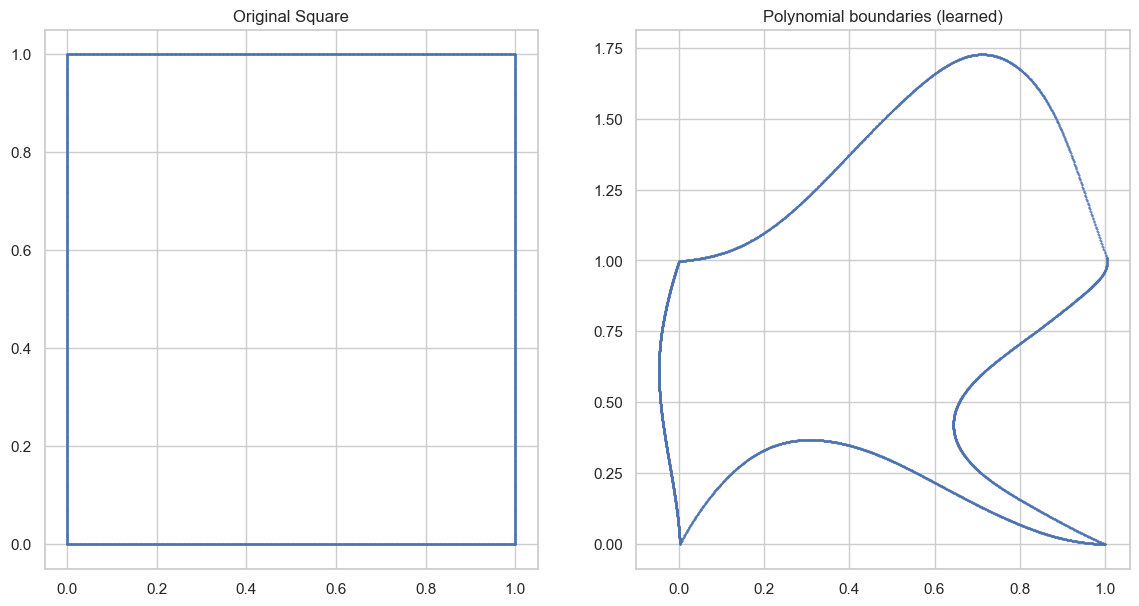

In [51]:
plot_boundary_comparison(hm, title="Polynomial boundaries (learned)")

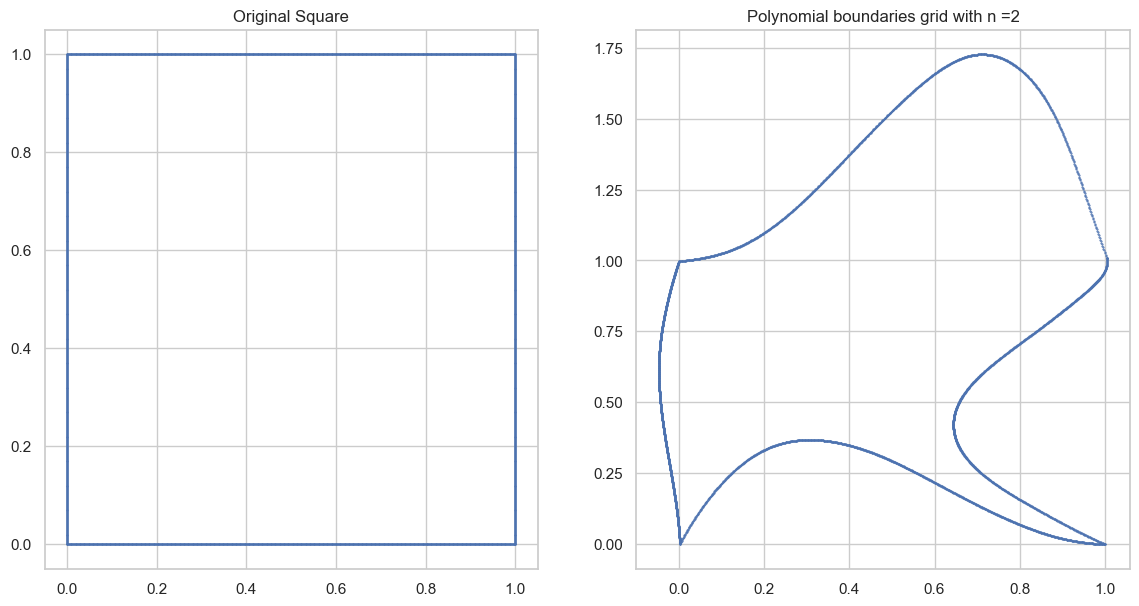

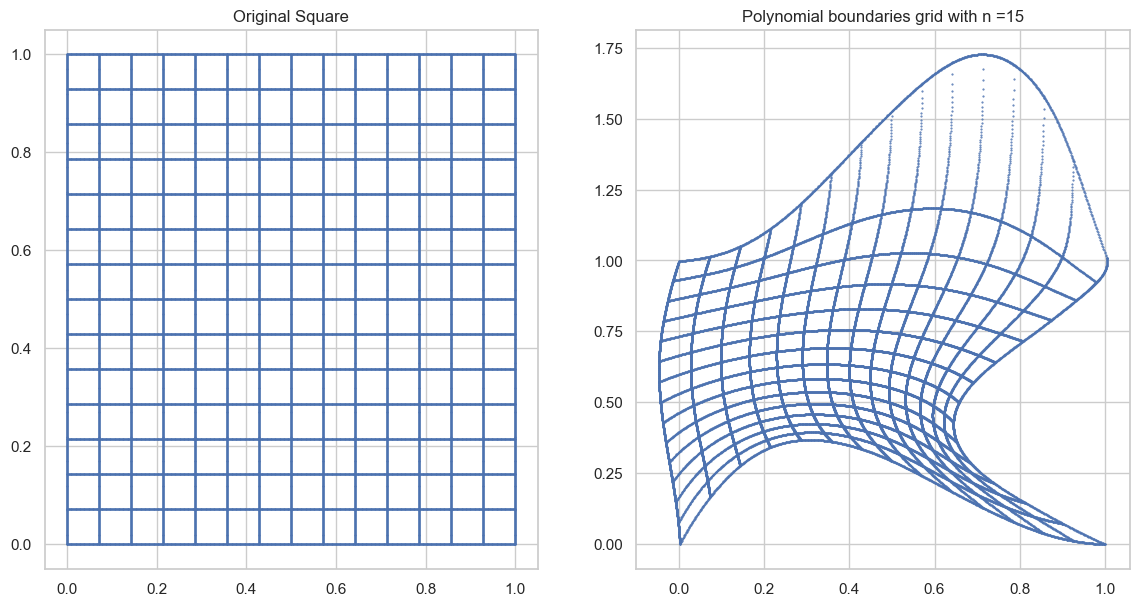

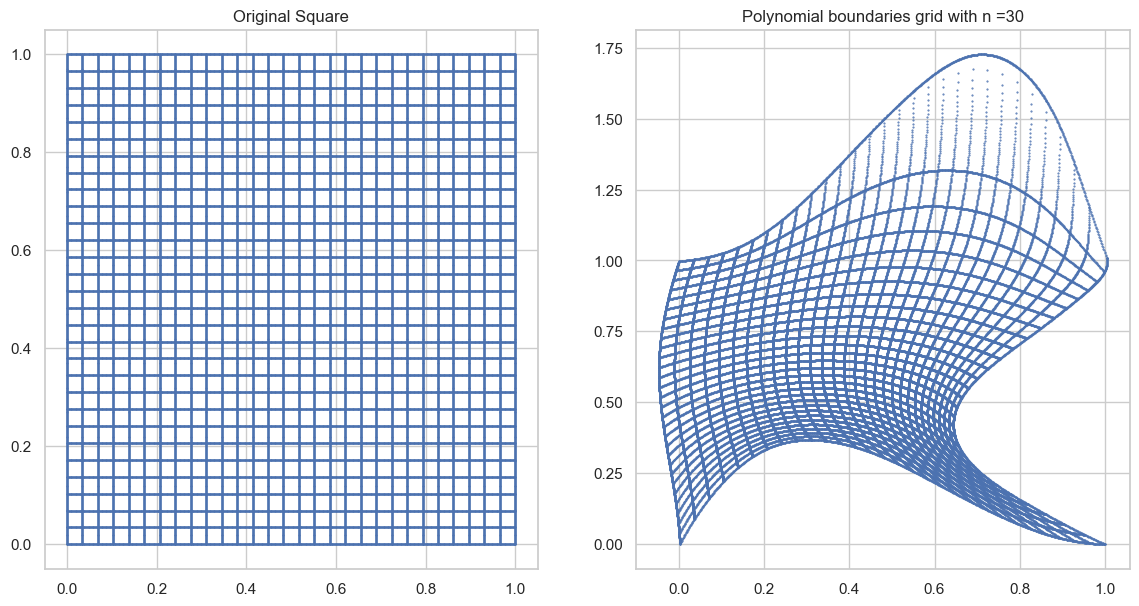

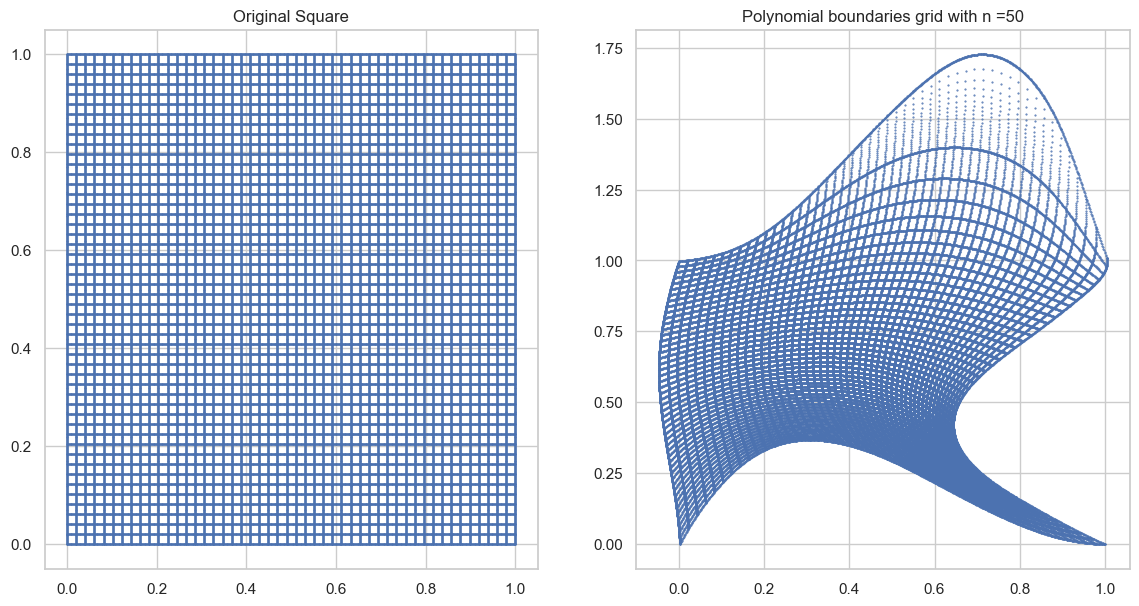

In [52]:
for n in grid_sizes:
    plot_grid_comparison(hm, grid_size_x=n, grid_size_y=n, title=f"Polynomial boundaries grid with n ={n}")

# Sine boundaries

The harmonic map problem that we need to solve is

$$ A(D u):H(u_i)= 0 \quad \text{ for } \quad i \in \{1,2\}$$

with
$$ A(D u) = \begin{pmatrix} (\partial_{x_2} u) \cdot (\partial_{x_2} u) & - (\partial_{x_1} u) \cdot (\partial_{x_2} u) \\ - (\partial_{x_1} u) \cdot (\partial_{x_2} u) & (\partial_{x_1} u) \cdot (\partial_{x_1} u) \end{pmatrix} $$
with the boundary condition of 
$$
g(x_1, x_2) = \begin{pmatrix} (1 - c   \sin( f_x   \pi   x_2))   (2x_1 - 1) \\
 (1 - c   \sin( f_y   \pi   x_1))   (2x_2 - 1) \end{pmatrix} \quad (x_1, x_2) \in \partial([0,1]^2)
$$

where $c, f_x$ and $f_y$ are parameters that can be varied.

In [53]:
from hmpinn.PDEs.harmonic_maps.sin_boundaries import sin_boundaries_BC

## Sine Boundaries $f_x = -1.5$ and $f_y = 3$

In [54]:
f_x = -1.5
f_y = 3
path = f"../simulation_studies/harmonic_maps/outputs/sin_boundaries_hm_f_x_{f_x}_f_y_{f_y}"

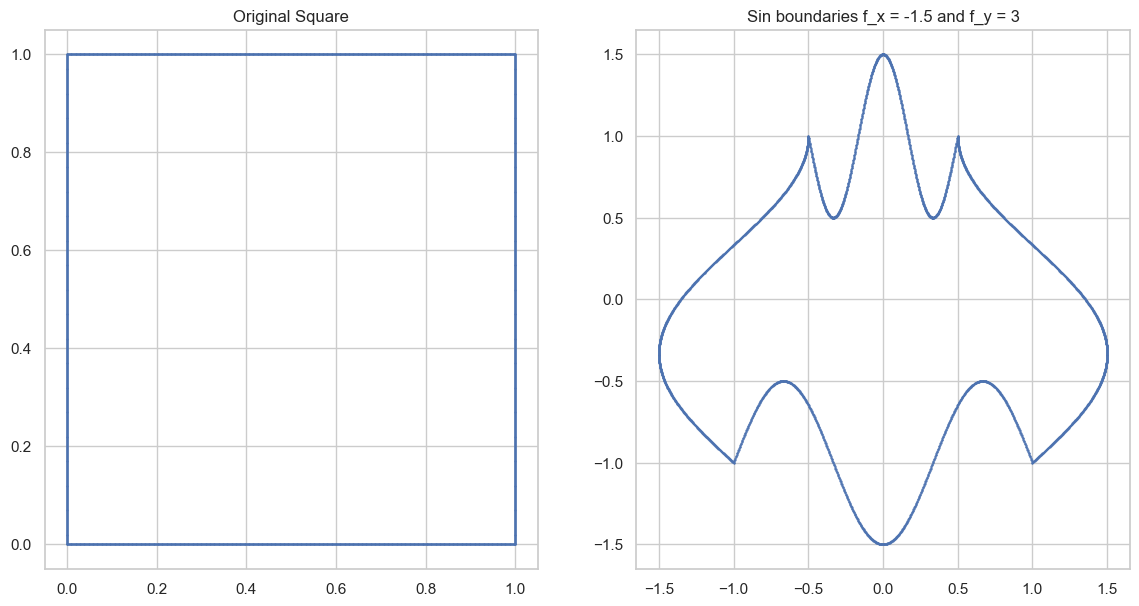

In [55]:
plot_boundary_comparison(sin_boundaries_BC, frequency_x=f_x, frequency_y=f_y,
                 title=f"Sin boundaries f_x = {f_x} and f_y = {f_y}")

### Loss

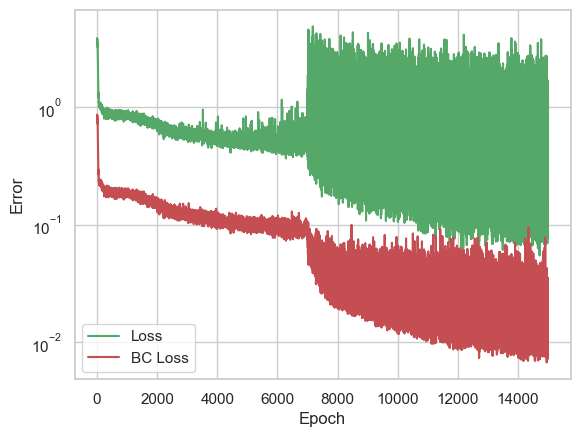

In [56]:
plot_errors_from_path(path)

In [57]:
hm, _, _, _, _ = load_model(path)
hm.eval()

print(hm)

ModelV2(
  (network): Sequential(
    (layer_0): Linear(in_features=2, out_features=64, bias=True)
    (gelu_0): GELU(approximate='none')
    (layer_1): Linear(in_features=64, out_features=64, bias=True)
    (gelu_1): GELU(approximate='none')
    (layer_2): Linear(in_features=64, out_features=64, bias=True)
    (gelu_2): GELU(approximate='none')
    (layer_3): Linear(in_features=64, out_features=64, bias=True)
    (gelu_3): GELU(approximate='none')
    (layer_4): Linear(in_features=64, out_features=64, bias=True)
    (gelu_4): GELU(approximate='none')
    (layer_5): Linear(in_features=64, out_features=64, bias=True)
    (gelu_5): GELU(approximate='none')
    (layer_6): Linear(in_features=64, out_features=2, bias=True)
  )
)


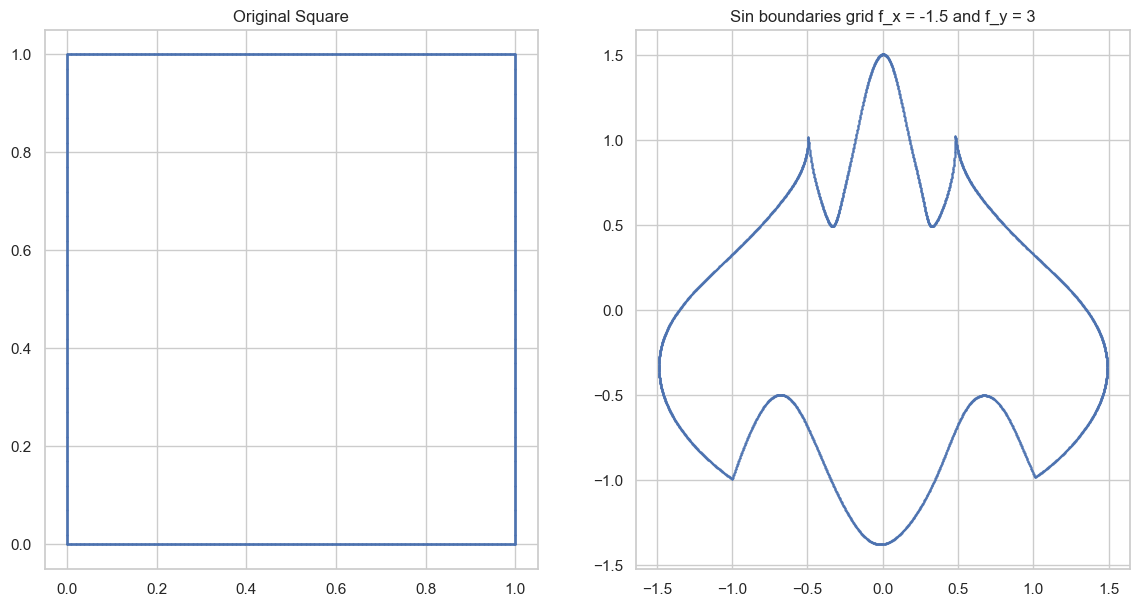

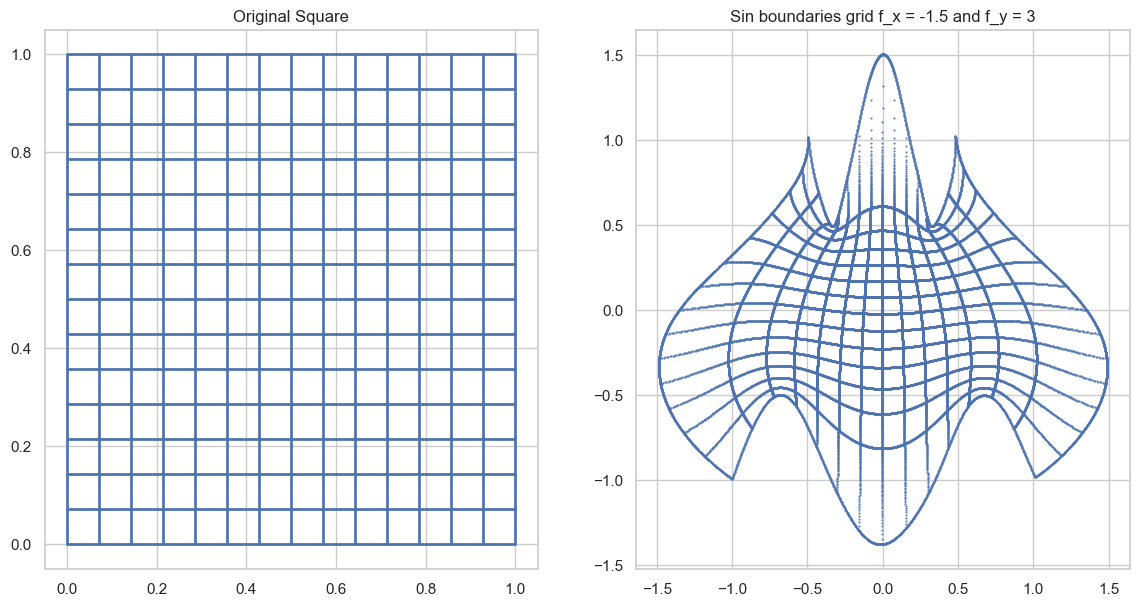

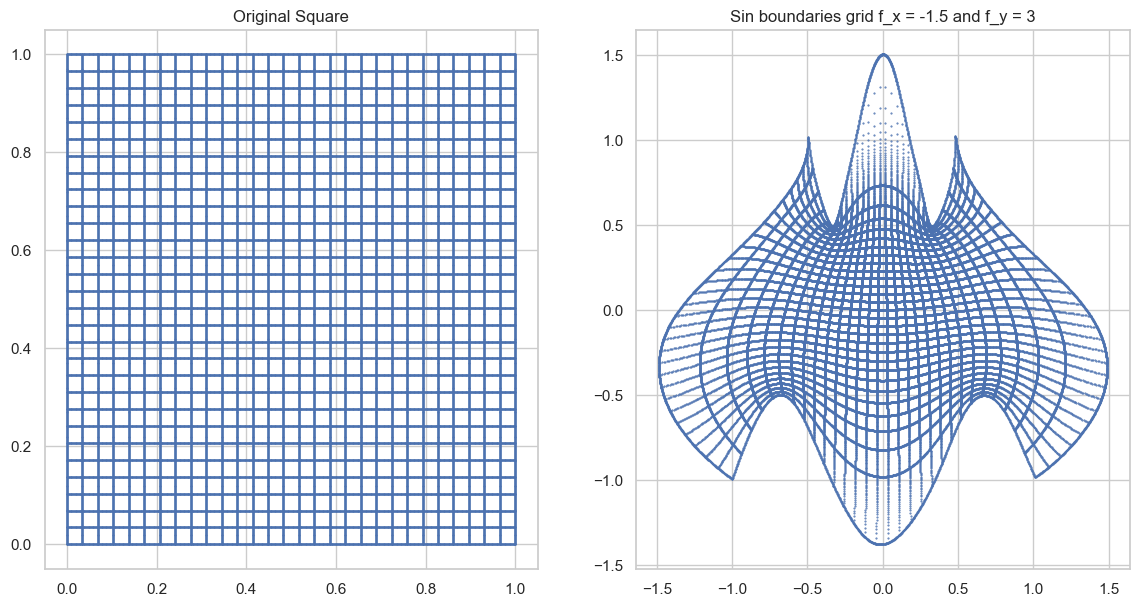

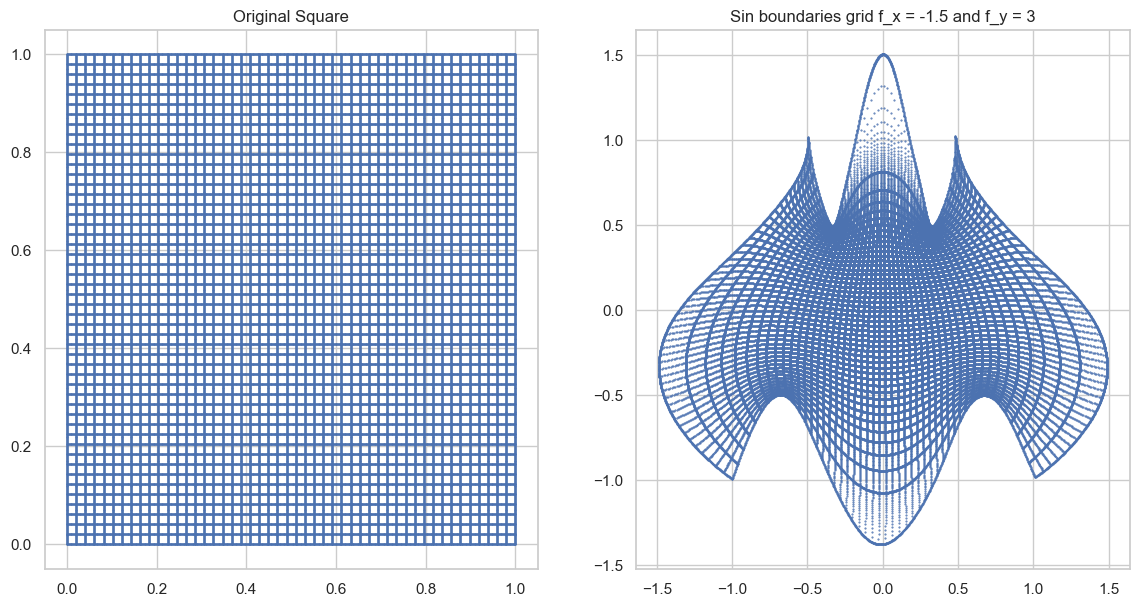

In [58]:
for n in grid_sizes:
    plot_grid_comparison(hm, grid_size_x=n, grid_size_y=n, title=f"Sin boundaries grid f_x = {f_x} and f_y = {f_y}",)

## What is we don't use the second order optimizer?

## Sine Boundaries $f_x = -1.5$ and $f_y = 3$ only first order optimizer

In [59]:
f_x = -1.5
f_y = 3.0
path = f"../simulation_studies/harmonic_maps/outputs/sin_boundaries_hm_f_x_{f_x}_f_y_{f_y}_no_second_optim"

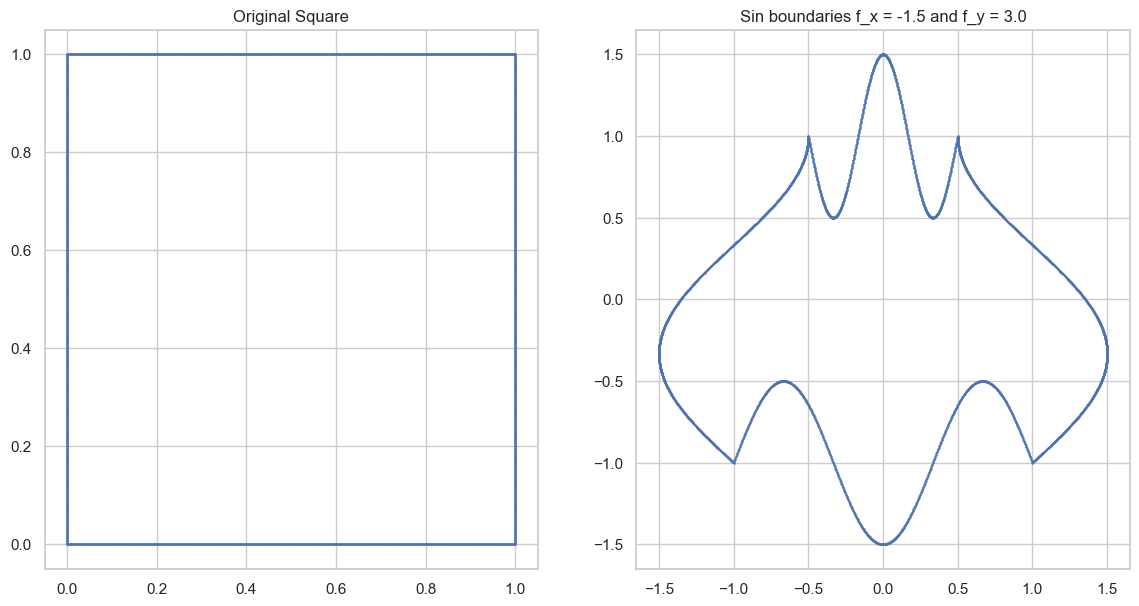

In [60]:
plot_boundary_comparison(sin_boundaries_BC, frequency_x=f_x, frequency_y=f_y,
                 title=f"Sin boundaries f_x = {f_x} and f_y = {f_y}")

### Loss

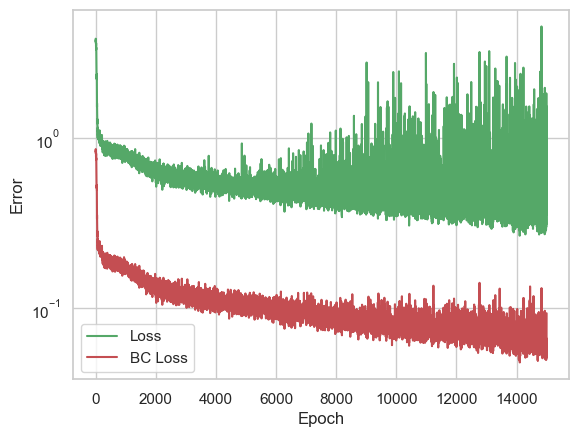

In [61]:
plot_errors_from_path(path)

In [62]:
hm, _, _, _, _ = load_model(path)
hm.eval()

print(hm)

ModelV2(
  (network): Sequential(
    (layer_0): Linear(in_features=2, out_features=64, bias=True)
    (gelu_0): GELU(approximate='none')
    (layer_1): Linear(in_features=64, out_features=64, bias=True)
    (gelu_1): GELU(approximate='none')
    (layer_2): Linear(in_features=64, out_features=64, bias=True)
    (gelu_2): GELU(approximate='none')
    (layer_3): Linear(in_features=64, out_features=64, bias=True)
    (gelu_3): GELU(approximate='none')
    (layer_4): Linear(in_features=64, out_features=64, bias=True)
    (gelu_4): GELU(approximate='none')
    (layer_5): Linear(in_features=64, out_features=64, bias=True)
    (gelu_5): GELU(approximate='none')
    (layer_6): Linear(in_features=64, out_features=2, bias=True)
  )
)


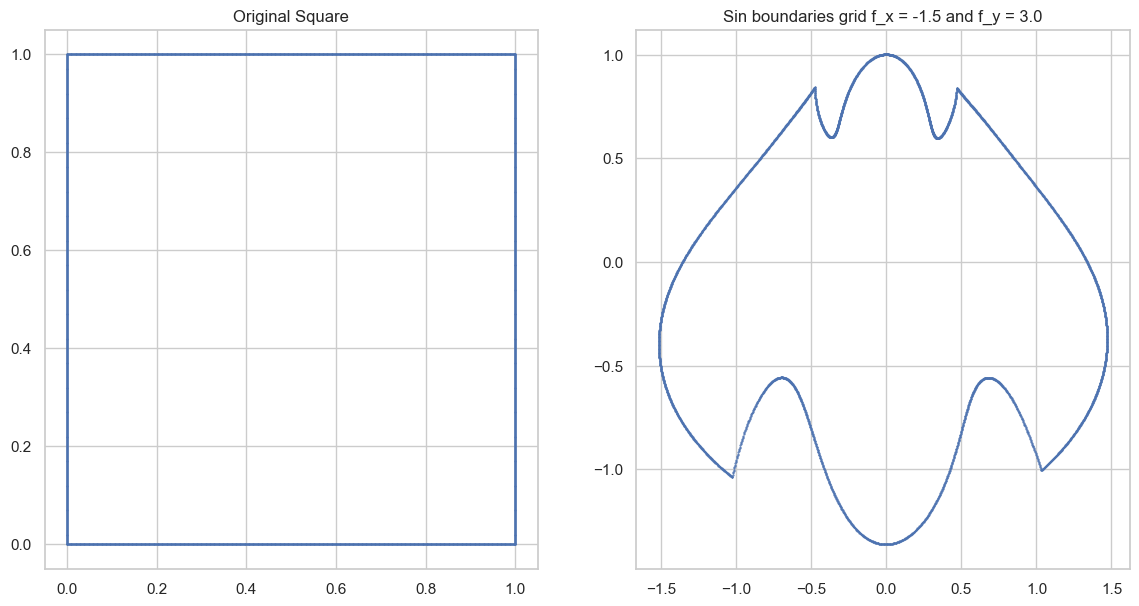

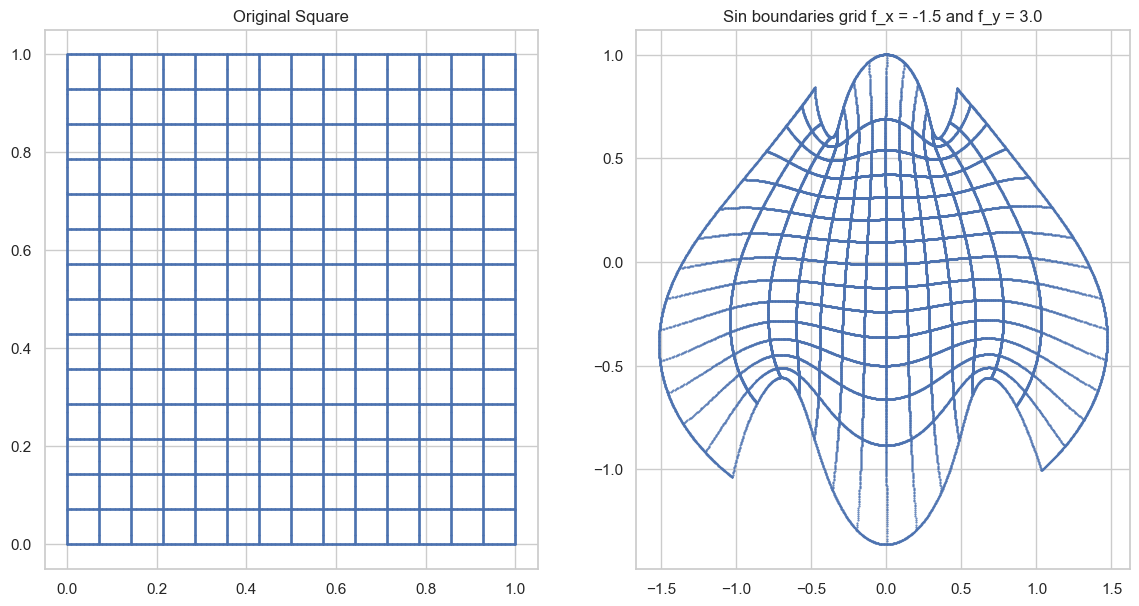

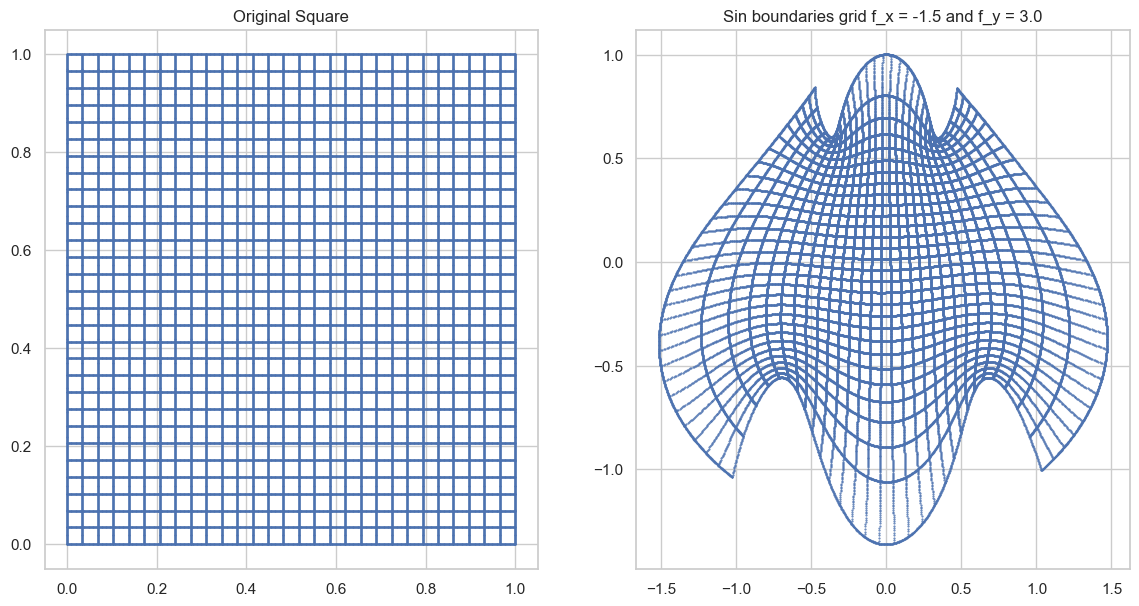

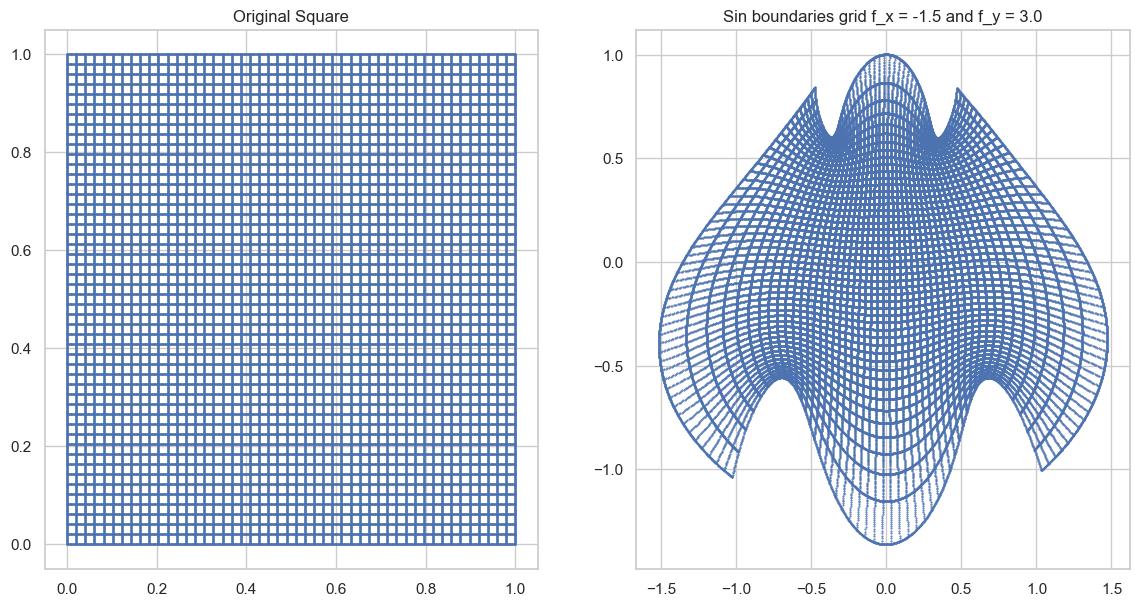

In [63]:
for n in grid_sizes:
    plot_grid_comparison(hm, grid_size_x=n, grid_size_y=n, title=f"Sin boundaries grid f_x = {f_x} and f_y = {f_y}",)

## Maybe its needs more epochs?

## Sine Boundaries $f_x = -1.5$ and $f_y = 3$ only first order optimizer and higher epochs

In [64]:
f_x = -1.5
f_y = 3.0
path = f"../simulation_studies/harmonic_maps/outputs/sin_boundaries_hm_f_x_{f_x}_f_y_{f_y}_no_second_optim_epochs_25000"

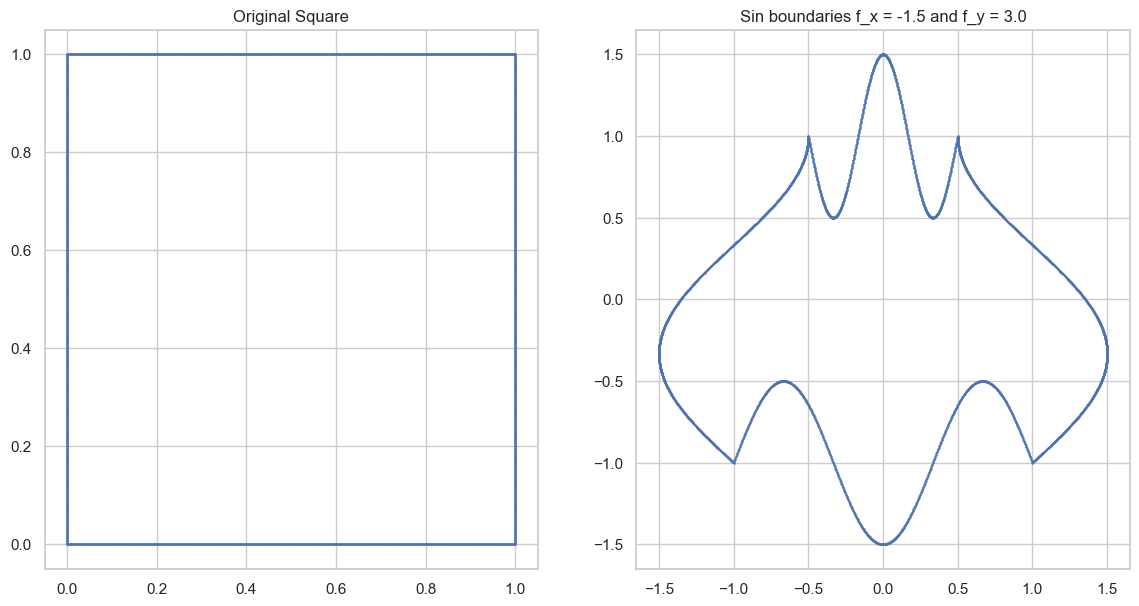

In [65]:
plot_boundary_comparison(sin_boundaries_BC, frequency_x=f_x, frequency_y=f_y,
                 title=f"Sin boundaries f_x = {f_x} and f_y = {f_y}")

### Loss

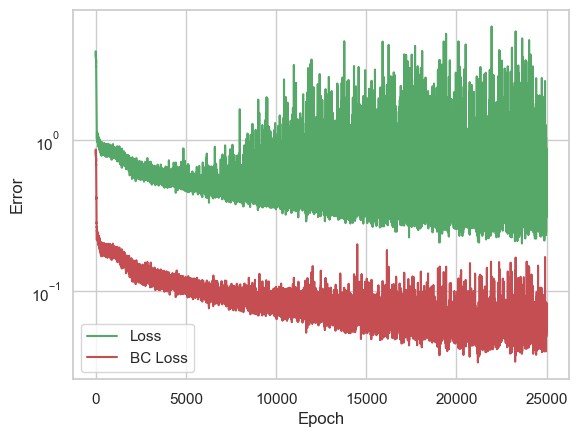

In [66]:
plot_errors_from_path(path)

In [67]:
hm, _, _, _, _ = load_model(path)
hm.eval()

print(hm)

ModelV2(
  (network): Sequential(
    (layer_0): Linear(in_features=2, out_features=64, bias=True)
    (gelu_0): GELU(approximate='none')
    (layer_1): Linear(in_features=64, out_features=64, bias=True)
    (gelu_1): GELU(approximate='none')
    (layer_2): Linear(in_features=64, out_features=64, bias=True)
    (gelu_2): GELU(approximate='none')
    (layer_3): Linear(in_features=64, out_features=64, bias=True)
    (gelu_3): GELU(approximate='none')
    (layer_4): Linear(in_features=64, out_features=64, bias=True)
    (gelu_4): GELU(approximate='none')
    (layer_5): Linear(in_features=64, out_features=64, bias=True)
    (gelu_5): GELU(approximate='none')
    (layer_6): Linear(in_features=64, out_features=2, bias=True)
  )
)


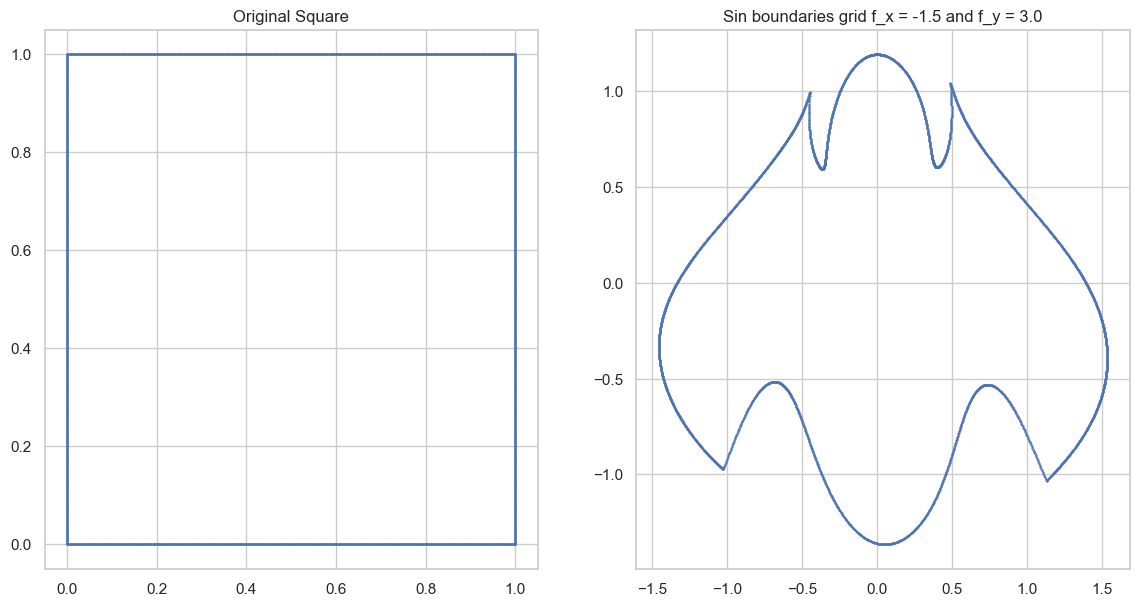

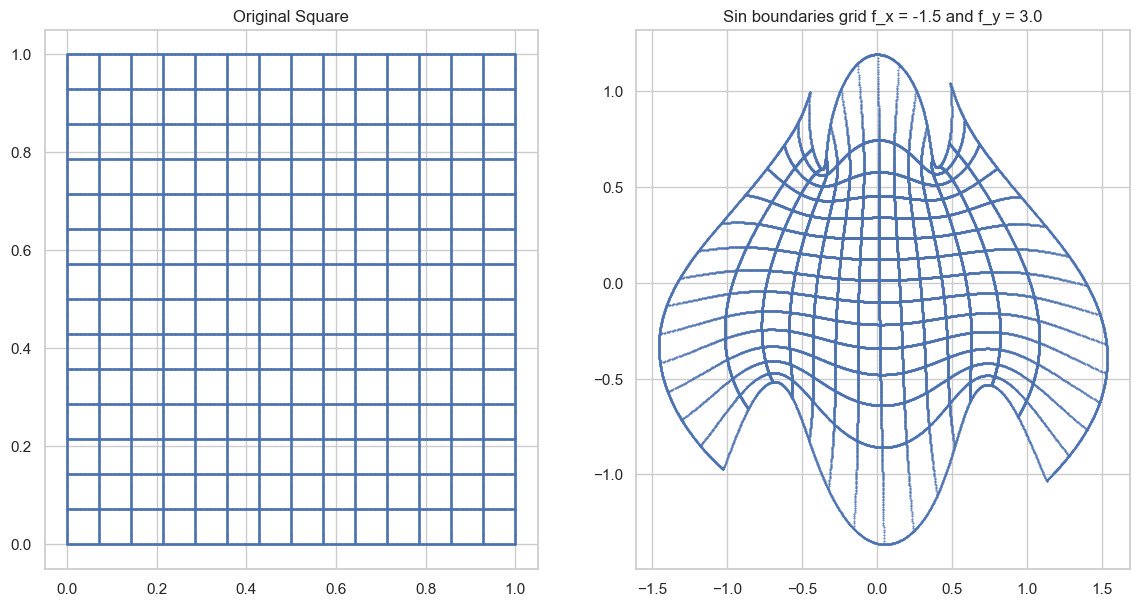

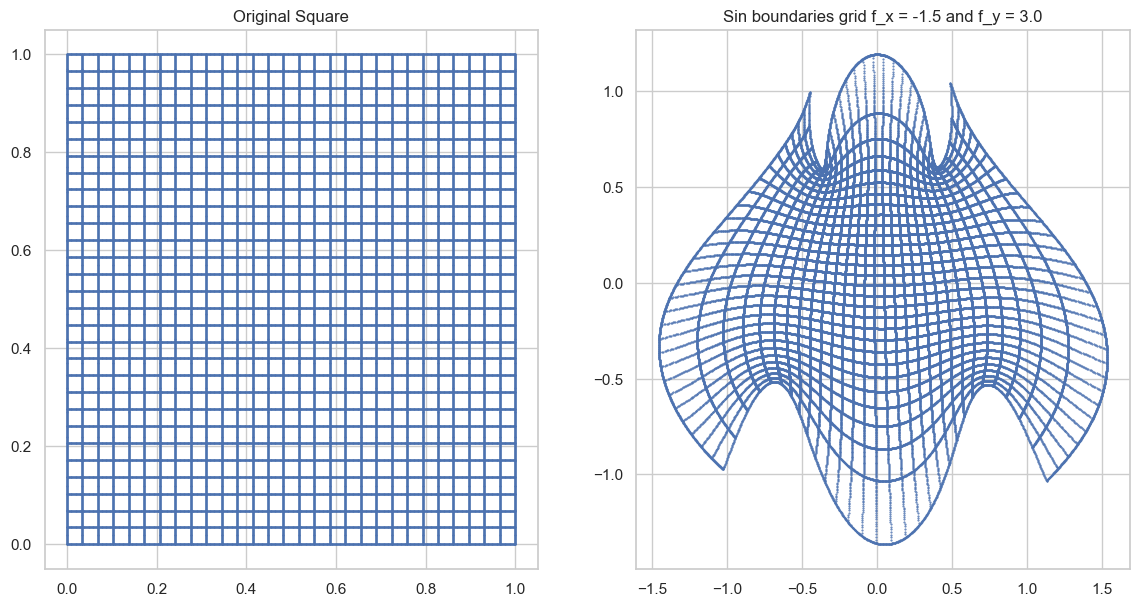

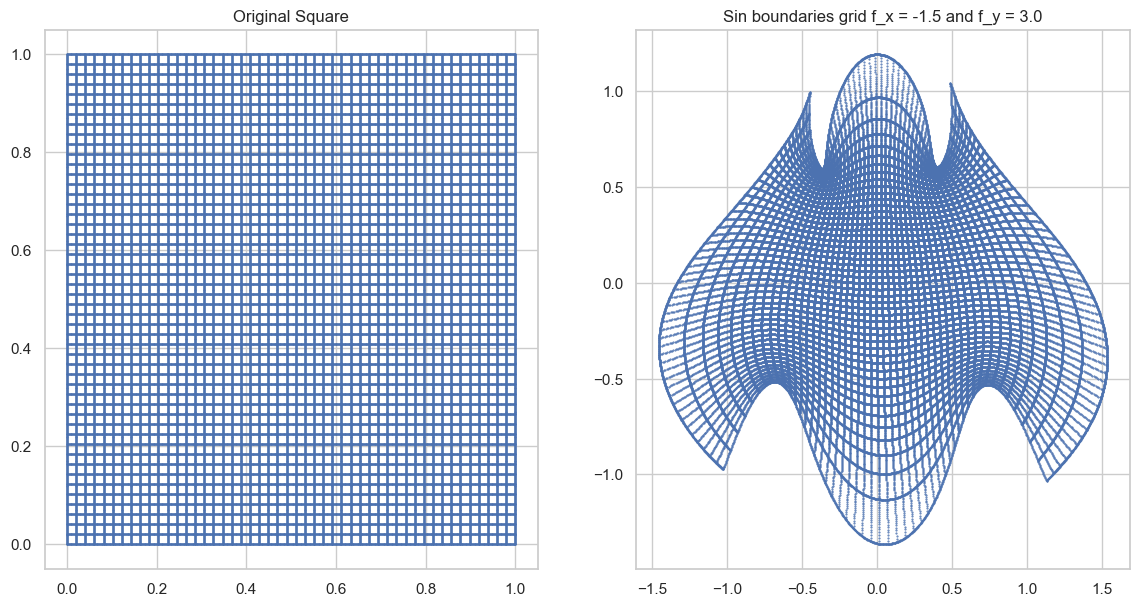

In [68]:
for n in grid_sizes:
    plot_grid_comparison(hm, grid_size_x=n, grid_size_y=n, title=f"Sin boundaries grid f_x = {f_x} and f_y = {f_y}", fig_size=(14, 7))

### What is the second order optimizer need a lower learning rate

In [69]:
f_x = -1.5
f_y = 3.0
path = f"../simulation_studies/harmonic_maps/outputs/sin_boundaries_hm_f_x_{f_x}_f_y_{f_y}_second_lr_1e-5"

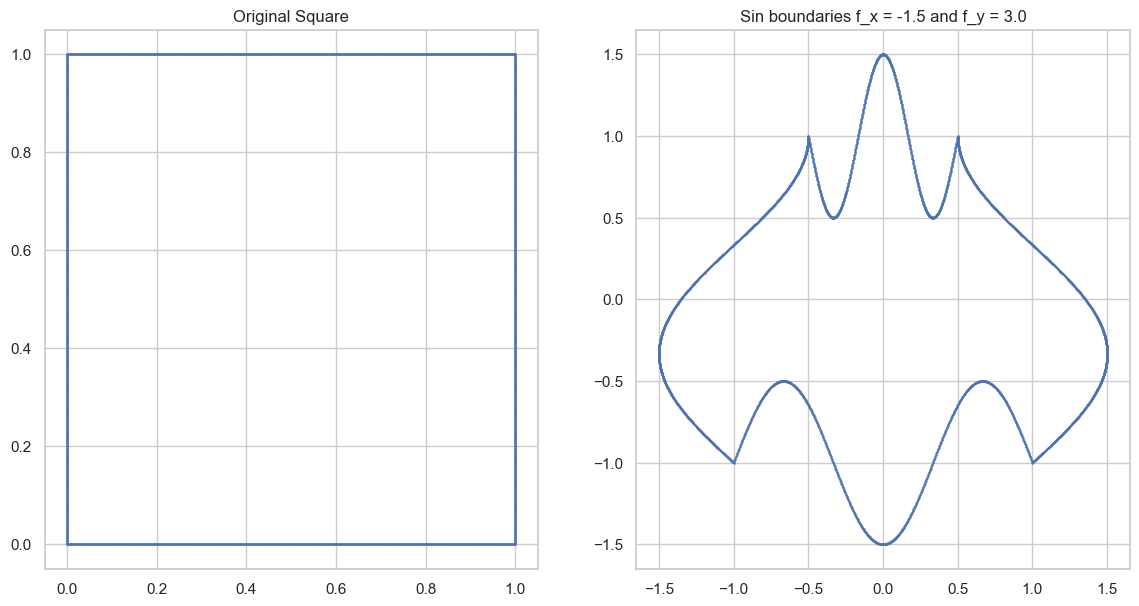

In [70]:
plot_boundary_comparison(sin_boundaries_BC, frequency_x=f_x, frequency_y=f_y,
                 title=f"Sin boundaries f_x = {f_x} and f_y = {f_y}")

### Loss

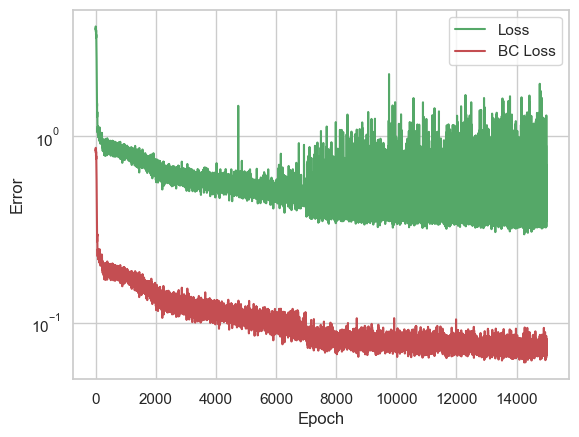

In [71]:
plot_errors_from_path(path)

In [72]:
hm, _, _, _, _ = load_model(path)
hm.eval()

print(hm)

ModelV2(
  (network): Sequential(
    (layer_0): Linear(in_features=2, out_features=64, bias=True)
    (gelu_0): GELU(approximate='none')
    (layer_1): Linear(in_features=64, out_features=64, bias=True)
    (gelu_1): GELU(approximate='none')
    (layer_2): Linear(in_features=64, out_features=64, bias=True)
    (gelu_2): GELU(approximate='none')
    (layer_3): Linear(in_features=64, out_features=64, bias=True)
    (gelu_3): GELU(approximate='none')
    (layer_4): Linear(in_features=64, out_features=64, bias=True)
    (gelu_4): GELU(approximate='none')
    (layer_5): Linear(in_features=64, out_features=64, bias=True)
    (gelu_5): GELU(approximate='none')
    (layer_6): Linear(in_features=64, out_features=2, bias=True)
  )
)


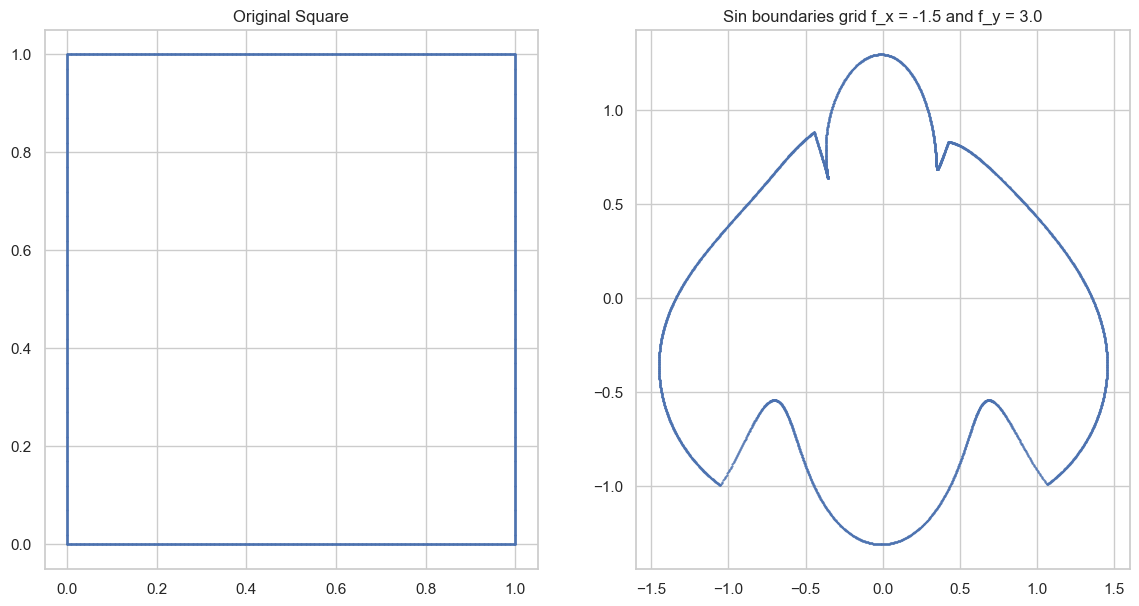

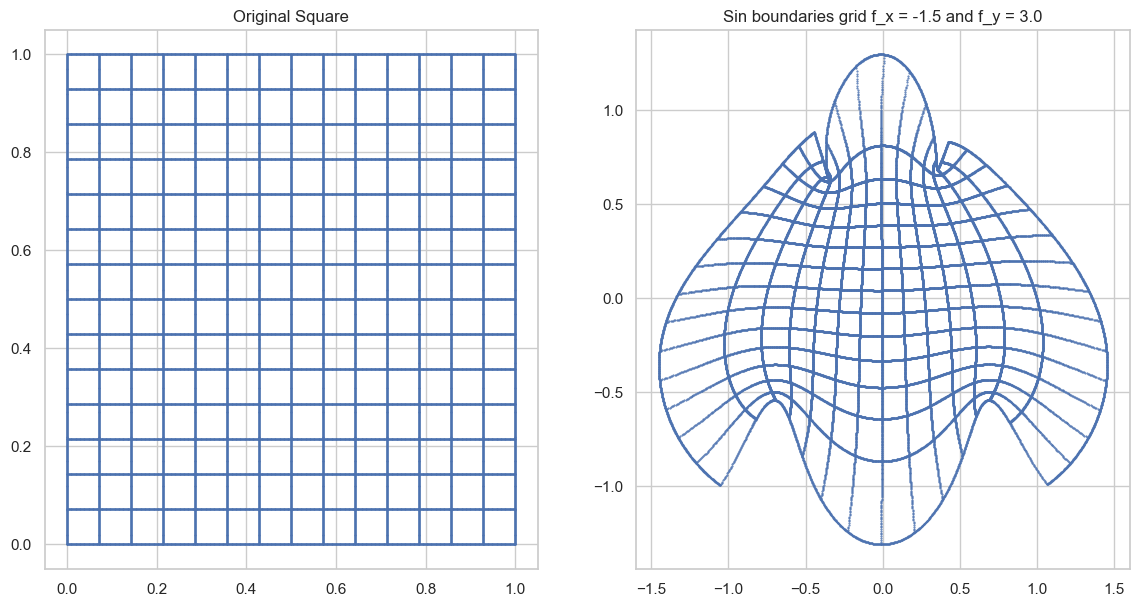

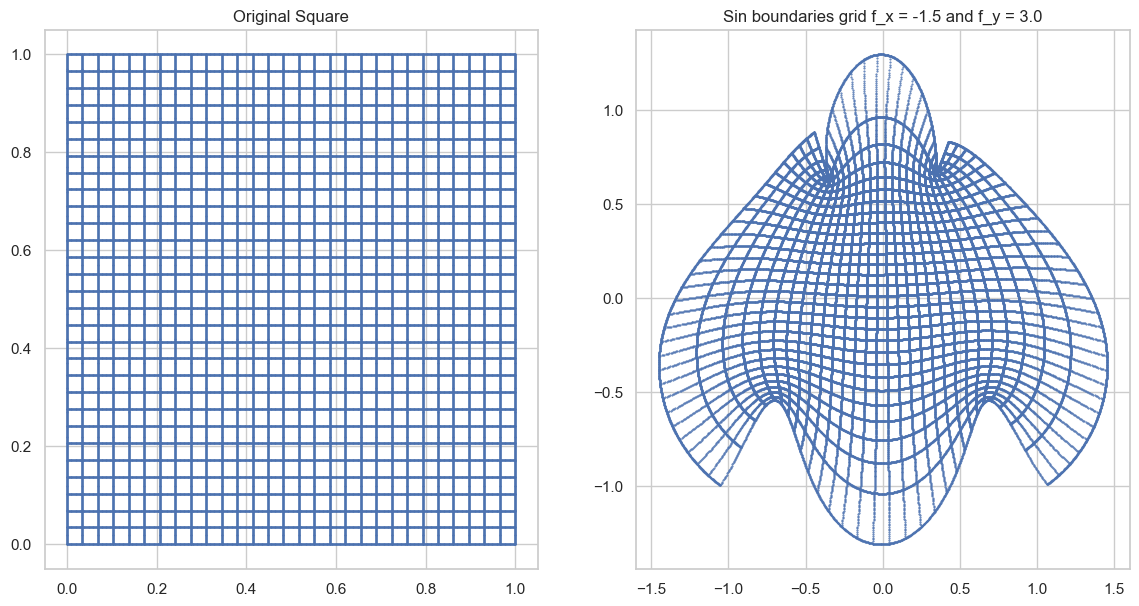

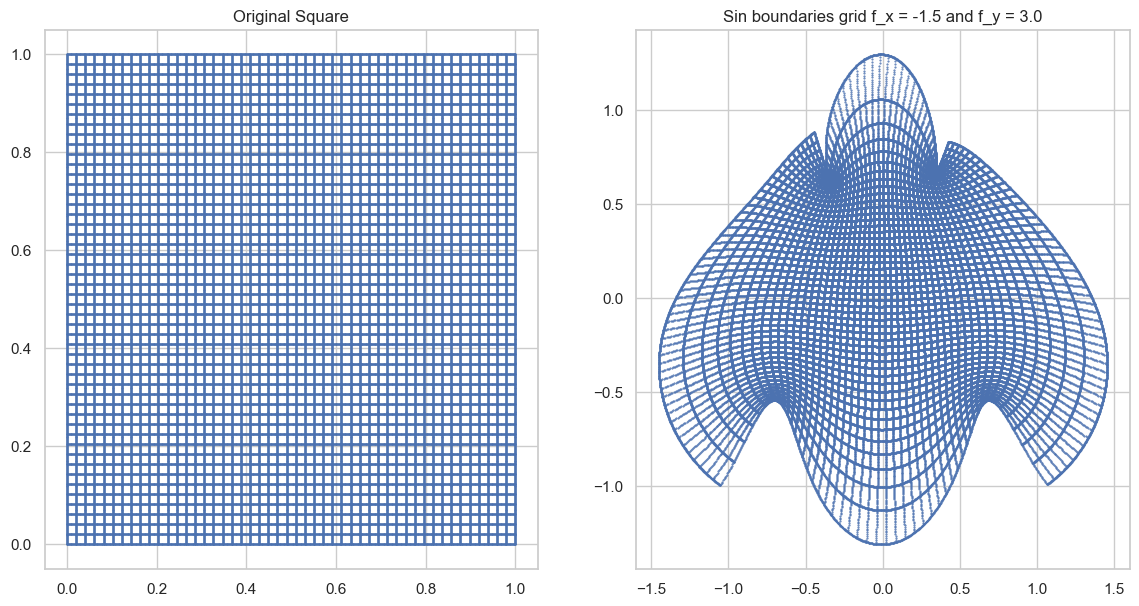

In [73]:
for n in grid_sizes:
    plot_grid_comparison(hm, grid_size_x=n, grid_size_y=n, title=f"Sin boundaries grid f_x = {f_x} and f_y = {f_y}",)

# What is we want a single model to solve many PDEs?

As a test I start with a set of PDEs that all depend on a constant c.

The harmonic map problem that we need to solve is

$$ A(D u):H(u_i)= 0 \quad \text{ for } \quad i \in \{1,2\}$$

with
$$ A(D u) = \begin{pmatrix} (\partial_{x_2} u) \cdot (\partial_{x_2} u) & - (\partial_{x_1} u) \cdot (\partial_{x_2} u) \\ - (\partial_{x_1} u) \cdot (\partial_{x_2} u) & (\partial_{x_1} u) \cdot (\partial_{x_1} u) \end{pmatrix} $$
with the boundary condition of 
$$
g(x_1, x_2) = \begin{pmatrix} (1 - c   \sin( f_x   \pi   x_2))   (2x_1 - 1) \\
 (1 - c   \sin( f_y   \pi   x_1))   (2x_2 - 1) \end{pmatrix} \quad (x_1, x_2) \in \partial([0,1]^2)
$$

where $c$ is the parameter that can be varied and $f_x = f_y=1$.

In [74]:
import sys
sys.path.append("..")
from experiments.parametric_hm.model import ParametricHmModel
import torch

In [75]:
f_x = 1
f_y = 1
path = f"experiments/parametric_hm/outputs"

In [76]:
# Define and load the model
model = ParametricHmModel()
model.load_state_dict(torch.load(path + "/model.pt", map_location=torch.device('cpu')))

<All keys matched successfully>

In [77]:
print(model)

ParametricHmModel(
  (network): Sequential(
    (layer_0): Linear(in_features=3, out_features=64, bias=True)
    (gelu_0): GELU(approximate='none')
    (layer_1): Linear(in_features=64, out_features=64, bias=True)
    (gelu_1): GELU(approximate='none')
    (layer_2): Linear(in_features=64, out_features=64, bias=True)
    (gelu_2): GELU(approximate='none')
    (layer_3): Linear(in_features=64, out_features=64, bias=True)
    (gelu_3): GELU(approximate='none')
    (layer_4): Linear(in_features=64, out_features=64, bias=True)
    (gelu_4): GELU(approximate='none')
    (layer_5): Linear(in_features=64, out_features=64, bias=True)
    (gelu_5): GELU(approximate='none')
    (layer_6): Linear(in_features=64, out_features=2, bias=True)
  )
)


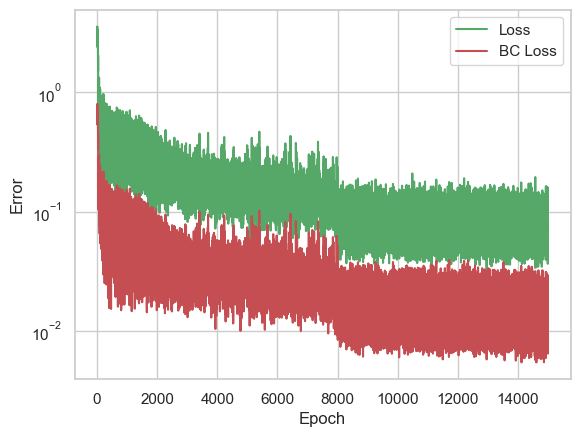

In [78]:
errors = torch.load(path + "/errors.pt", map_location=torch.device('cpu'))
grad_errors = torch.load(path + "/grad_errors.pt", map_location=torch.device('cpu'))
loss = torch.load(path + "/loss.pt", map_location=torch.device('cpu'))
BC_loss = torch.load(path + "/BC_loss.pt", map_location=torch.device('cpu'))
plot_errors_from_data(errors, grad_errors, loss, BC_loss)

## Curvature in (0, 0.6)

### Interior of the interval (0, 0.6)

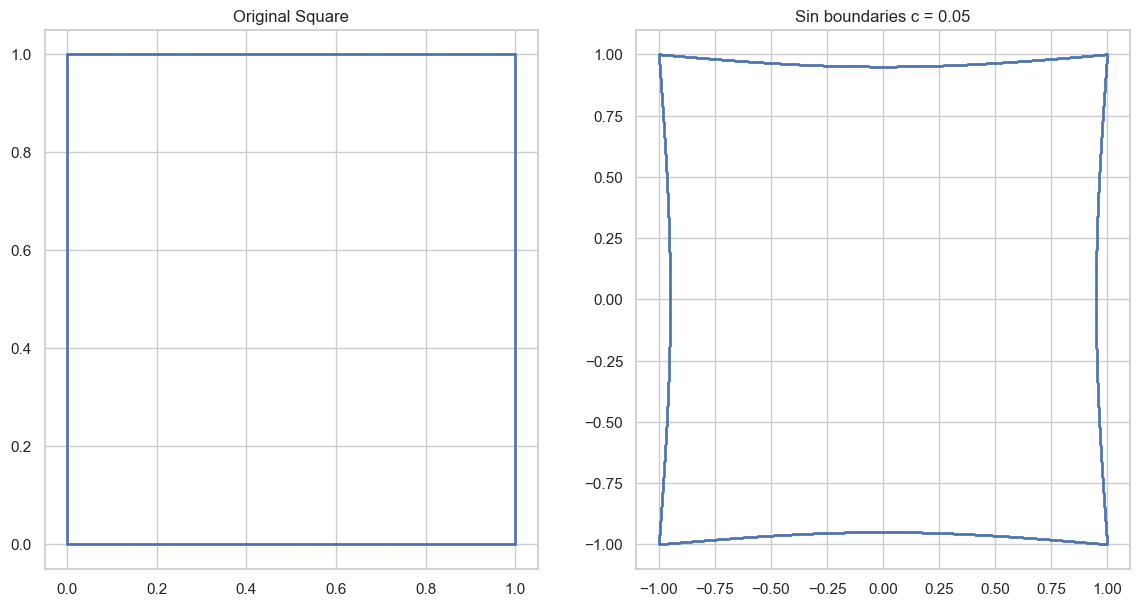

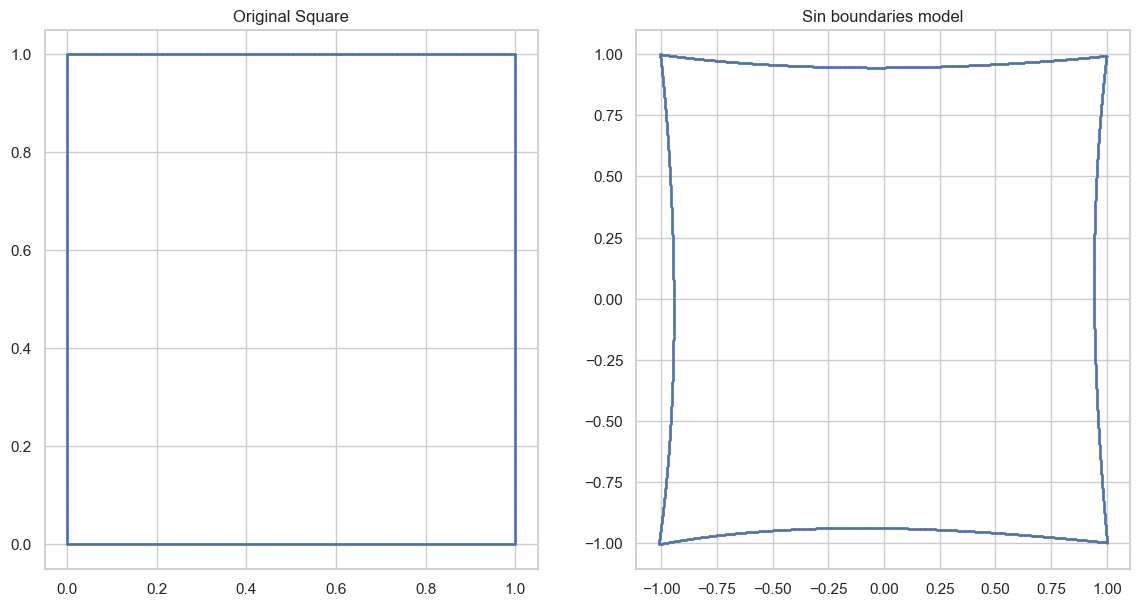

################################################################################################################################################################


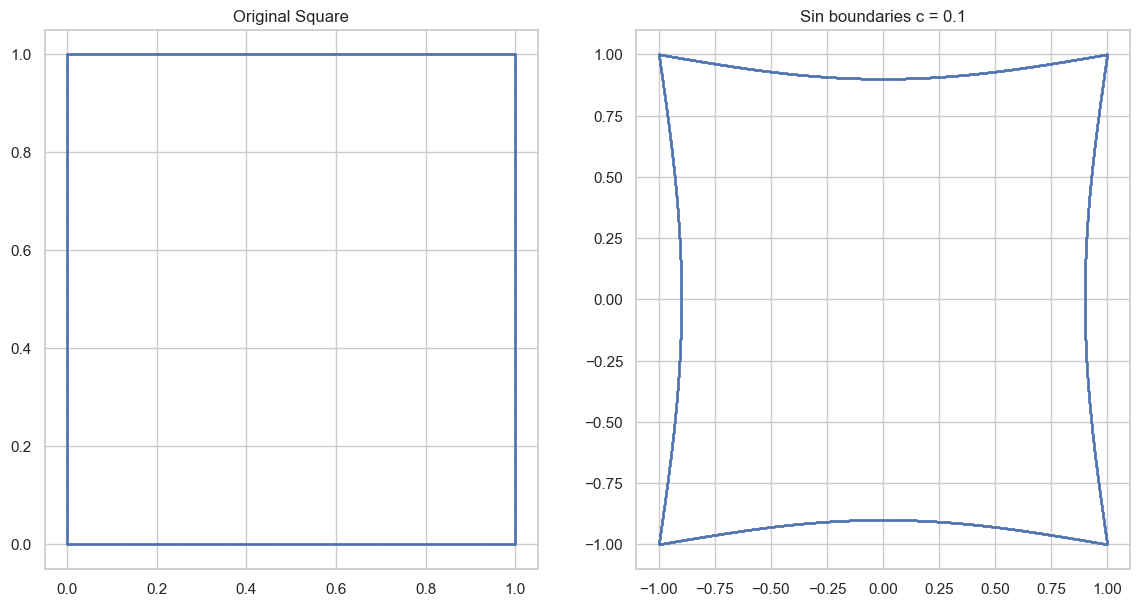

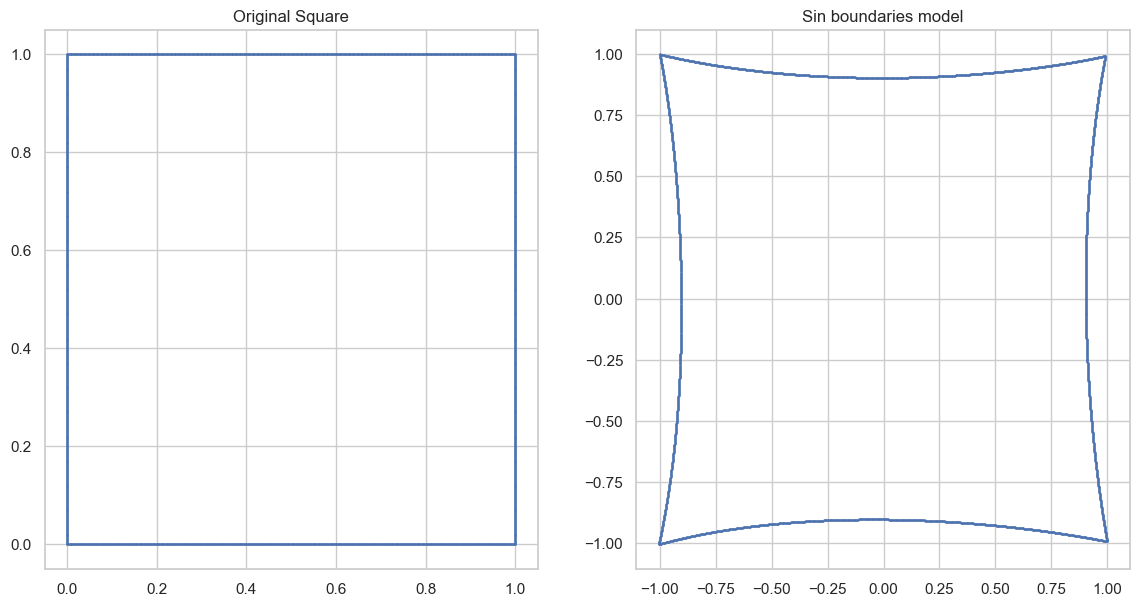

################################################################################################################################################################


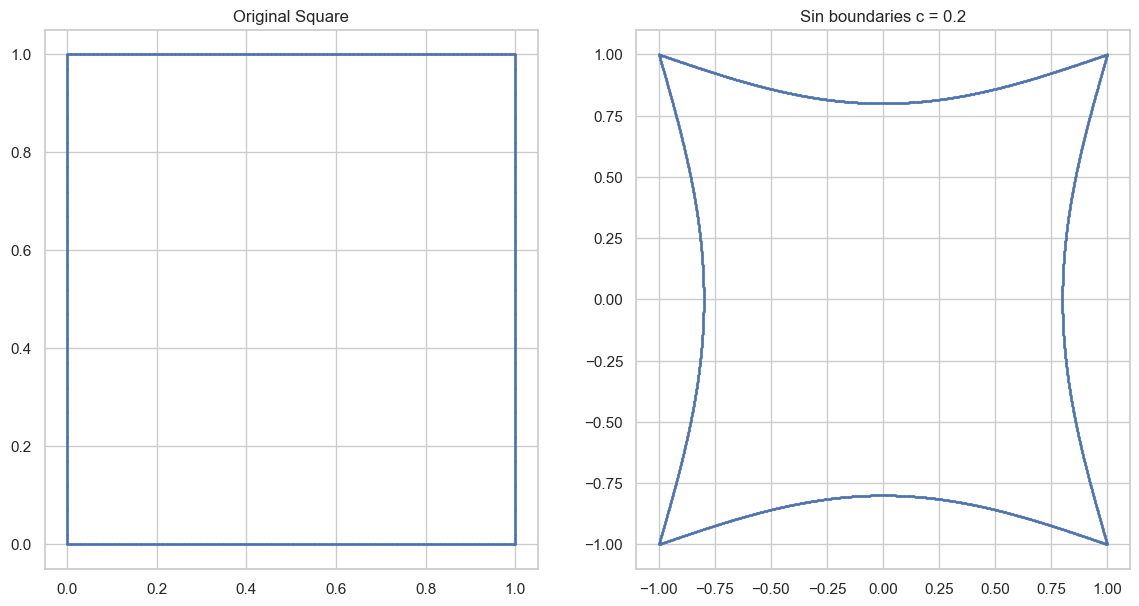

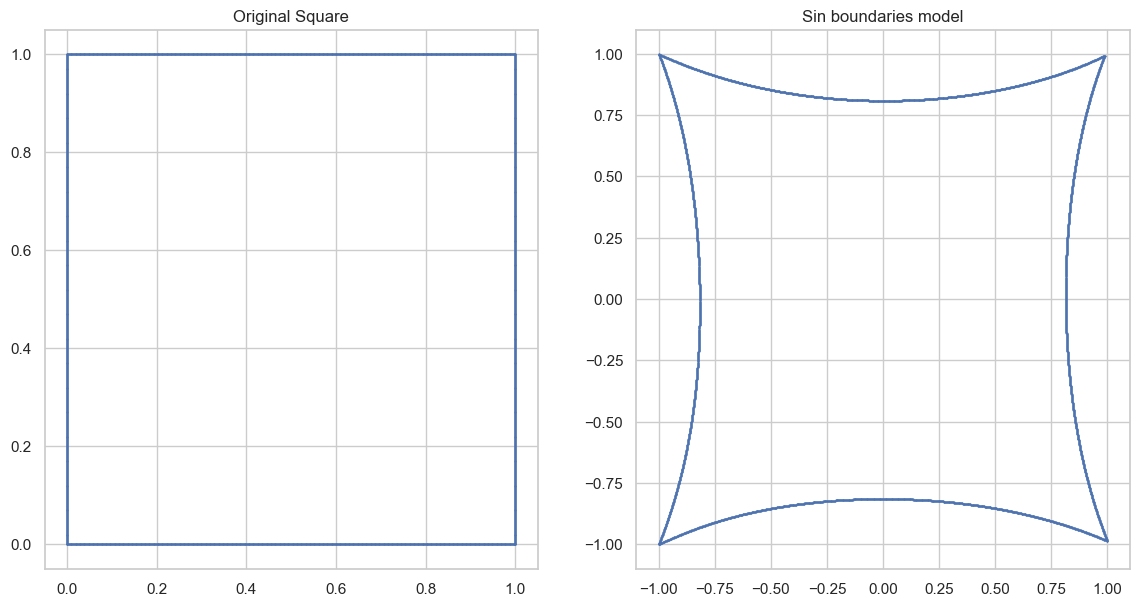

################################################################################################################################################################


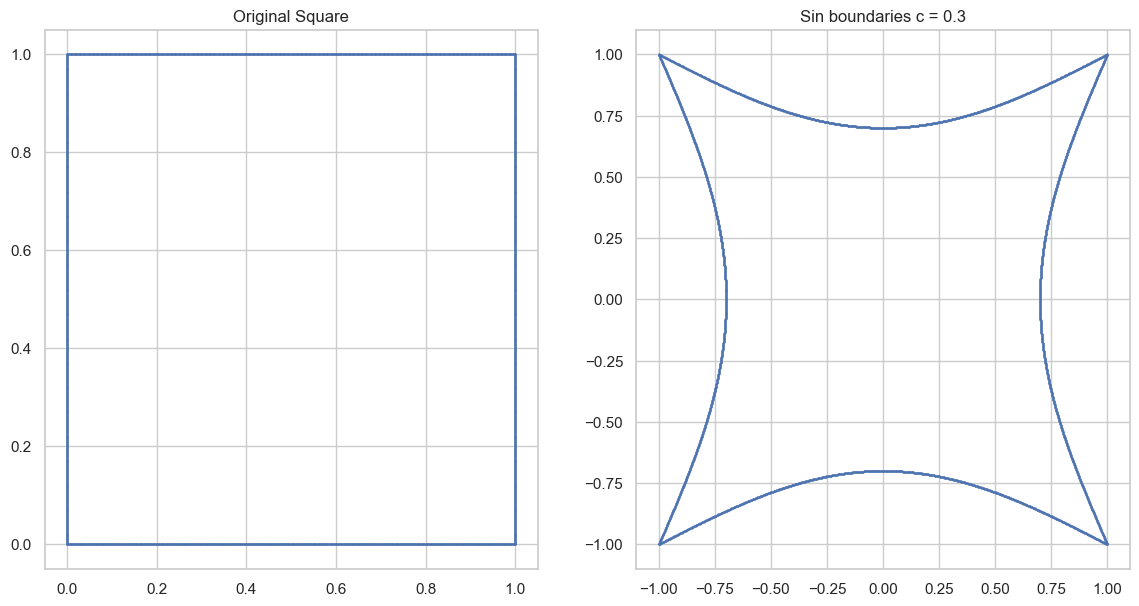

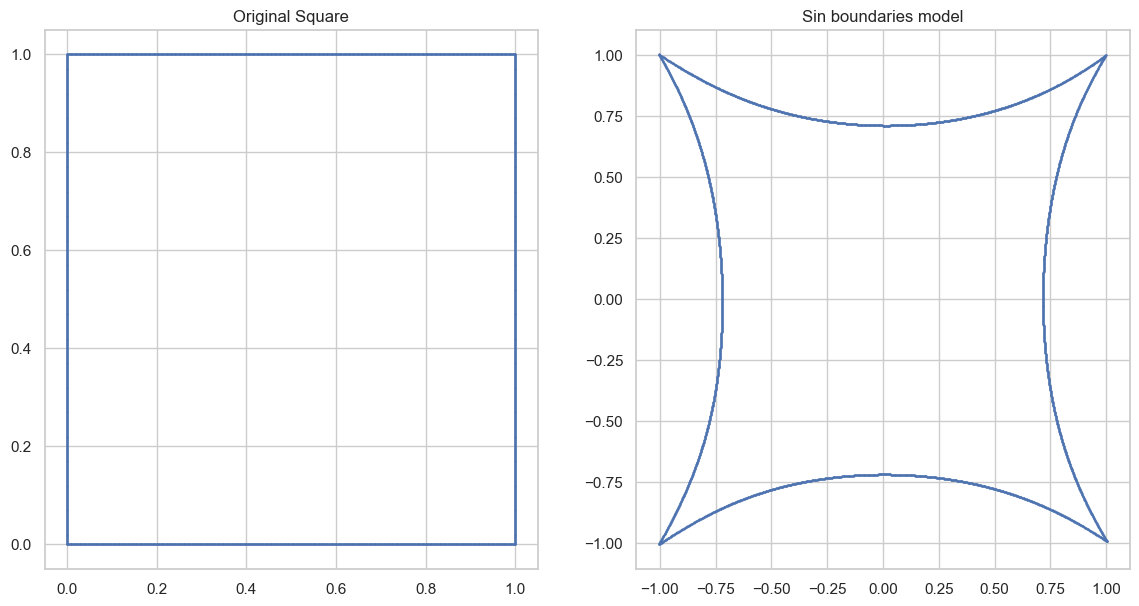

################################################################################################################################################################


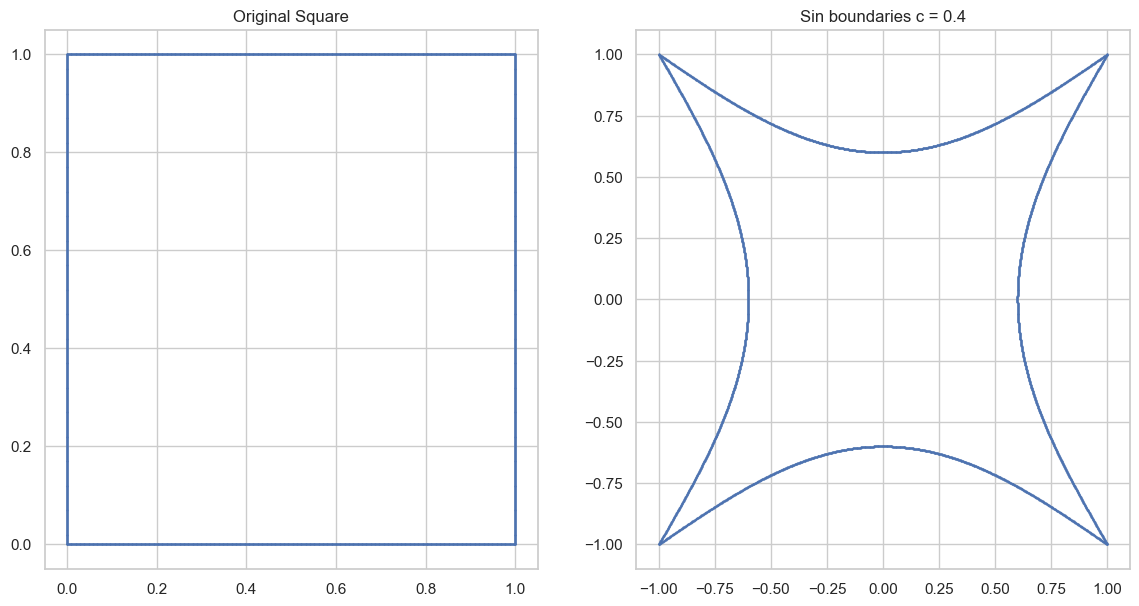

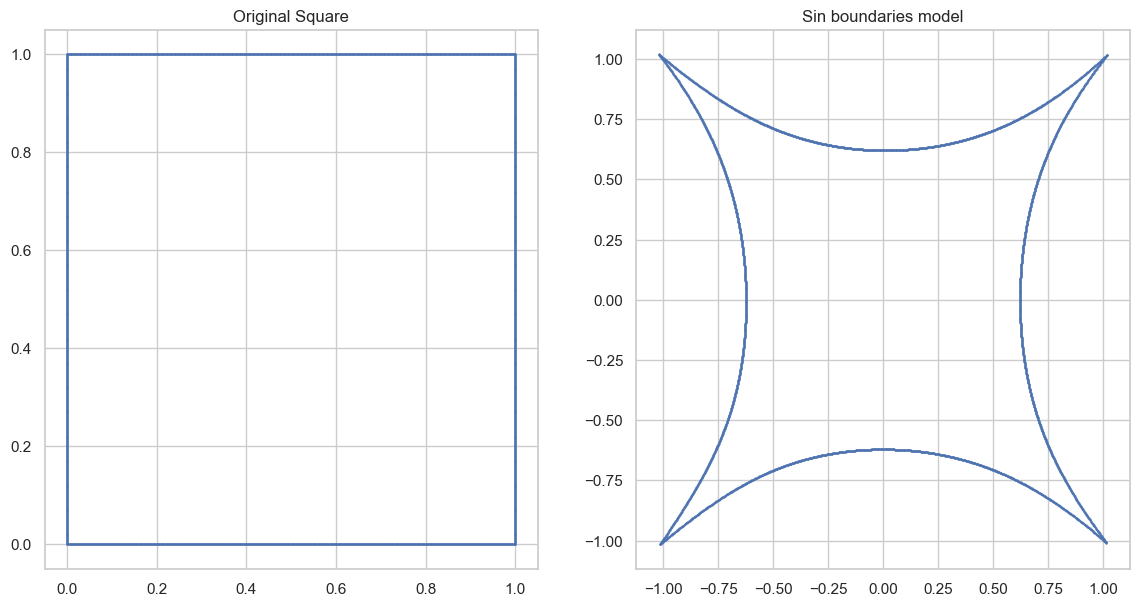

################################################################################################################################################################


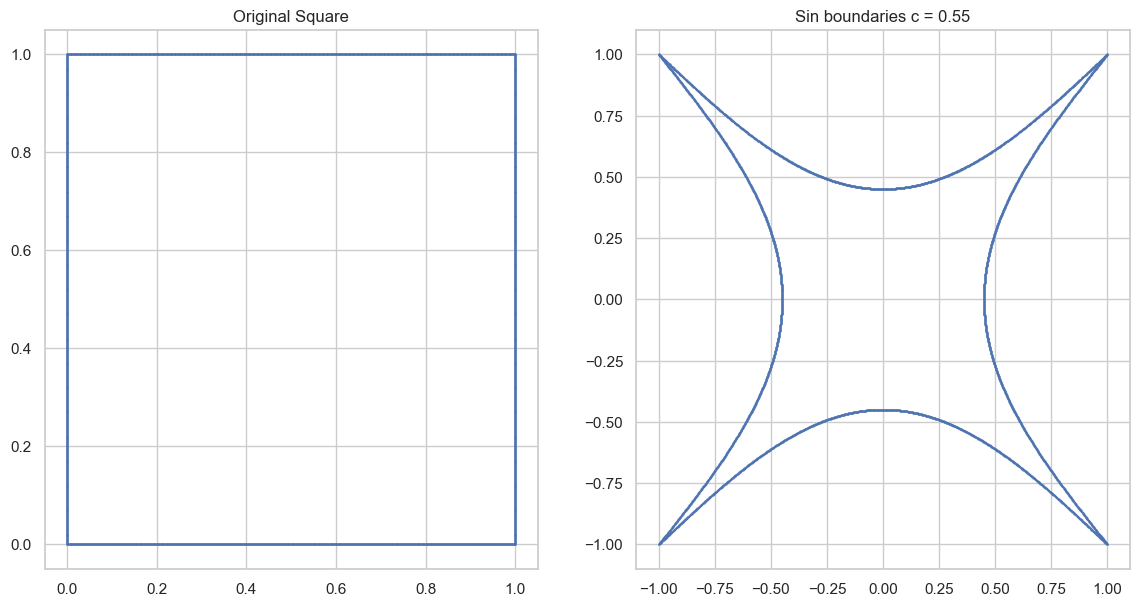

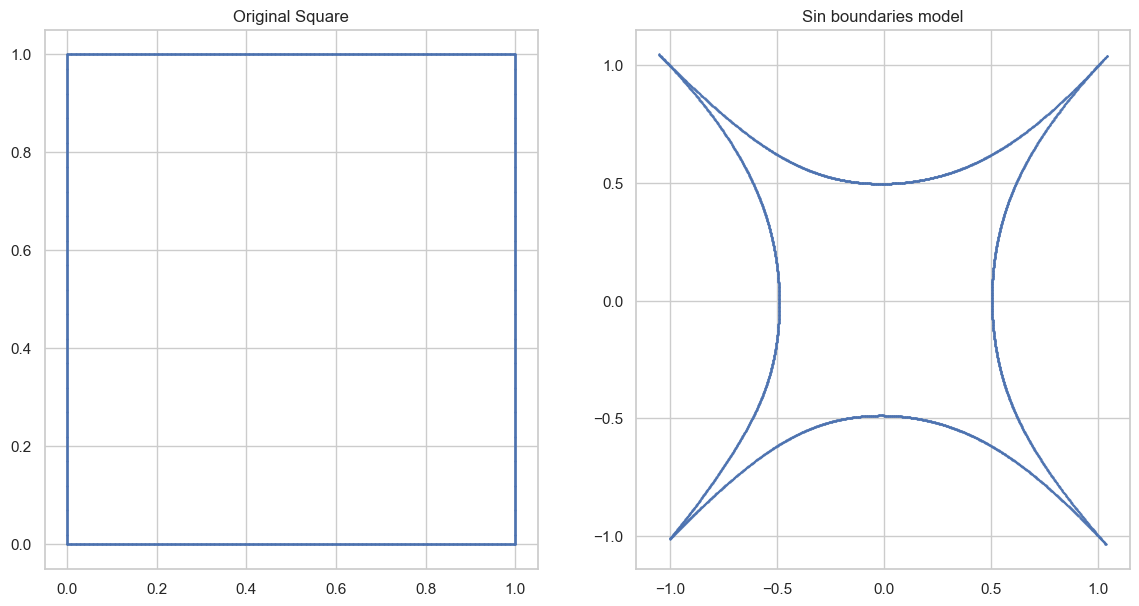

################################################################################################################################################################


In [79]:
from functools import partial
for param in [0.05, 0.1, 0.2, 0.3, 0.4, 0.55]:
    plot_boundary_comparison(sin_boundaries_BC, curvature=param,
                 title=f"Sin boundaries c = {param}")
    model_partial = partial(model, param=param)
    plot_grid_comparison(model_partial, grid_size_x=2, grid_size_y=2, title=f"Sin boundaries model",)
    print("#" * 160)

### Boundary of the interval (0, 0.6)

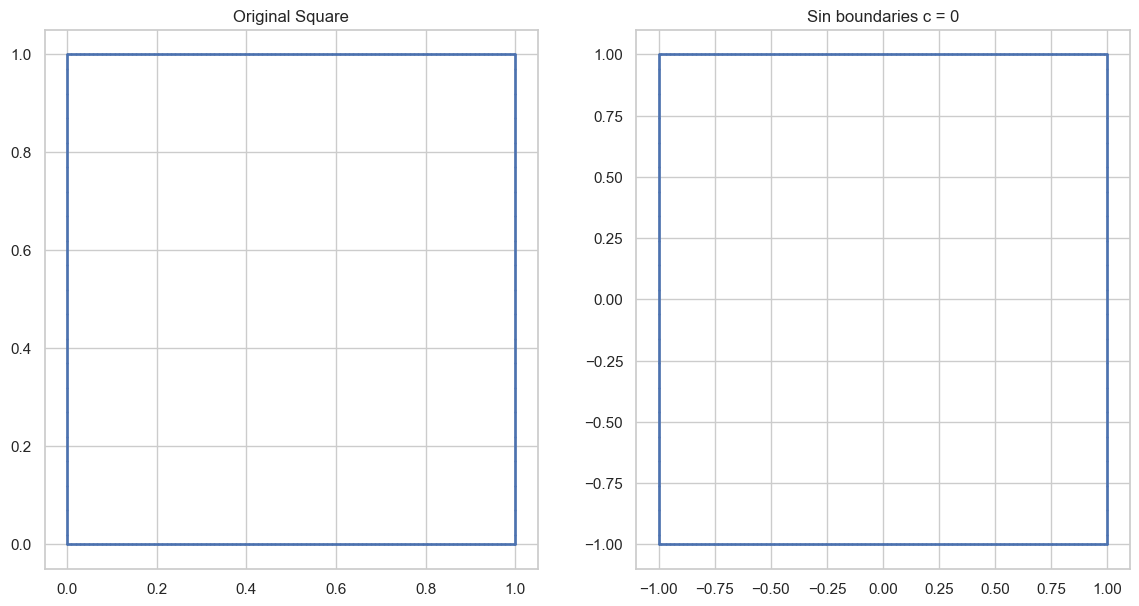

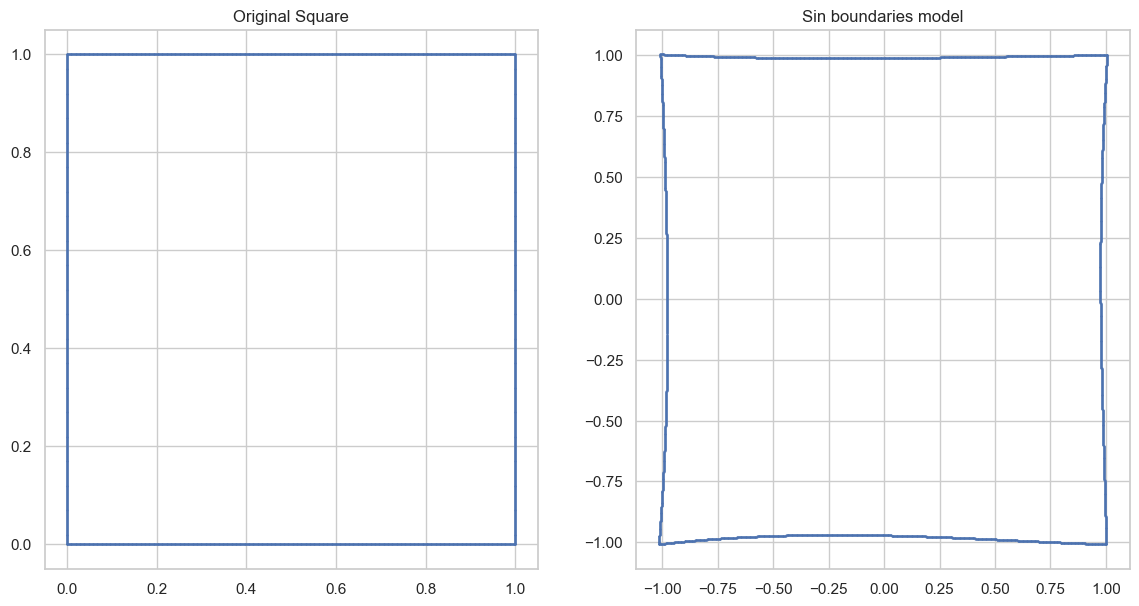

################################################################################################################################################################


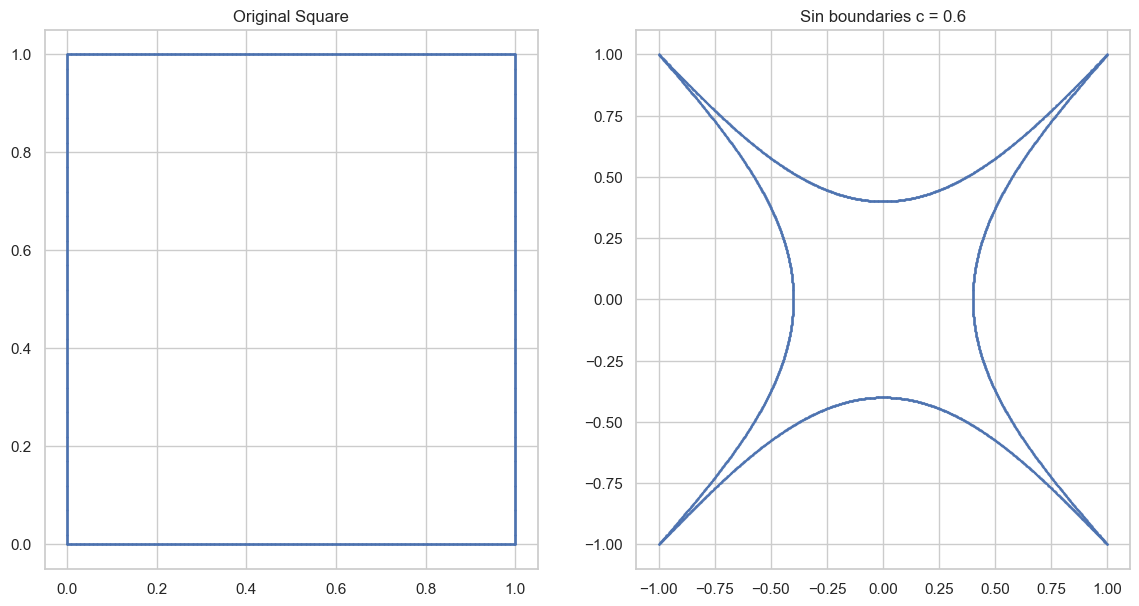

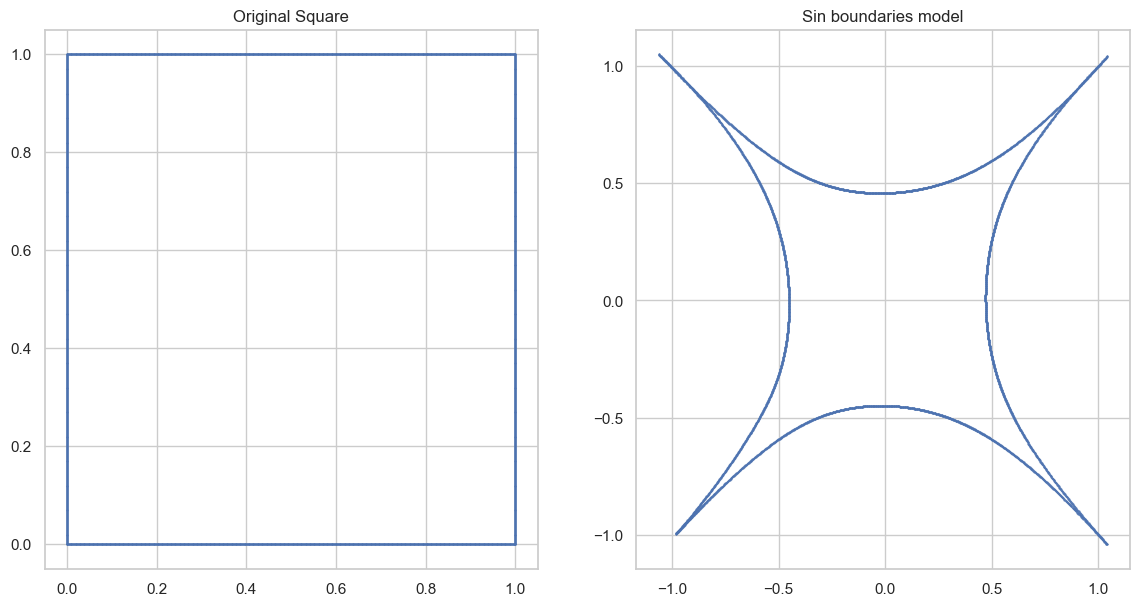

################################################################################################################################################################


In [80]:
for param in [0, 0.6]:
    plot_boundary_comparison(sin_boundaries_BC, curvature=param,
                 title=f"Sin boundaries c = {param}")
    model_partial = partial(model, param=param)
    plot_grid_comparison(model_partial, grid_size_x=2, grid_size_y=2, title=f"Sin boundaries model",)
    print("#" * 160)